# Andres Delgadillo
# Project Ensemble Techniques

## 1 Project: Travel Package Purchase Prediction

### 1.1 Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### 1.2 Data Dictionary

#### Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer


## 2 Import packages and turnoff warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
sns.set(color_codes=True)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier

## 3 Import dataset and quality of data

In [2]:
# read data from excel file
data = pd.read_excel('Tourism.xlsx','Tourism')

In [3]:
# get columns
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [4]:
# get size of dataset
data.shape

(4888, 20)

In [7]:
data[data['DurationOfPitch']==36]

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
2505      202505          0  39.0  Company Invited         1             36.0   
2585      202585          0  46.0     Self Enquiry         1             36.0   
2643      202643          0  39.0     Self Enquiry         1             36.0   
2648      202648          1  39.0     Self Enquiry         1             36.0   
2703      202703          1  32.0  Company Invited         1             36.0   
2715      202715          1  48.0  Company Invited         1             36.0   
2796      202796          0  49.0     Self Enquiry         3             36.0   
2853      202853          0  43.0  Company Invited         1             36.0   
2868      202868          0  58.0     Self Enquiry         3             36.0   
2869      202869          0  51.0     Self Enquiry         1             36.0   
2904      202904          0  27.0     Self Enquiry         3             36.0   
3048      203048          0  43.0     Self Enquiry         1             36.0   
3192      203192          1  27.0  Company Invited         3             36.0   
3200      203200          0  33.0  Company Invited         1             36.0   
3236      203236          1  34.0  Company Invited         1             36.0   
3268      203268          0  43.0     Self Enquiry         1             36.0   
3309      203309          0  31.0     Self Enquiry         3             36.0   
3319      203319          0  45.0     Self Enquiry         1             36.0   
3423      203423          0  35.0     Self Enquiry         1             36.0   
3481      203481          0  46.0     Self Enquiry         1             36.0   
3517      203517          0  29.0     Self Enquiry         1             36.0   
3553      203553          0  31.0     Self Enquiry         3             36.0   
3674      203674          0  25.0     Self Enquiry         1             36.0   
3718      203718          0  32.0     Self Enquiry         3             36.0   
3768      203768          0  30.0     Self Enquiry         1             36.0   
3870      203870          0  33.0     Self Enquiry         1             36.0   
3975      203975          0  39.0  Company Invited         1             36.0   
4055      204055          0  46.0     Self Enquiry         1             36.0   
4113      204113          0  39.0     Self Enquiry         1             36.0   
4118      204118          1  39.0     Self Enquiry         1             36.0   
4173      204173          1  32.0  Company Invited         1             36.0   
4185      204185          1  48.0  Company Invited         1             36.0   
4266      204266          0  49.0     Self Enquiry         3             36.0   
4323      204323          0  43.0  Company Invited         1             36.0   
4338      204338          0  58.0     Self Enquiry         3             36.0   
4339      204339          0  51.0     Self Enquiry         1             36.0   
4374      204374          0  27.0     Self Enquiry         3             36.0   
4518      204518          0  43.0     Self Enquiry         1             36.0   
4662      204662          1  27.0  Company Invited         3             36.0   
4670      204670          0  33.0  Company Invited         1             36.0   
4706      204706          1  34.0  Company Invited         1             36.0   
4738      204738          0  43.0     Self Enquiry         1             36.0   
4779      204779          0  31.0     Self Enquiry         3             36.0   
4789      204789          0  45.0     Self Enquiry         1             36.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
2505        Salaried  Female                       3                4.0   
2585  Small Business    Male                       3                4.0   
2643  Large Business    Male                       3                4.0   
2648  Small Business    Male                       4        

In [5]:
# check dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
# check dataset missing values
total = data.isnull().sum().sort_values(ascending=False) # total number of null values
print(total)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64


In [7]:
# check for duplicates
data.duplicated().sum()

0

- DurationOfPitch, MonthlyIncome, Age, NumberOfTrips, NumberOfChildrenVisiting,  NumberOfFollowups, PreferredPropertyStar  and TypeofContact columns have missing values
- There are not duplicated rows

## 4 Exploratory Data Analysis

In [8]:
# check first rows of data
data.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [9]:
data.tail()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

### 4.1 Pandas profiling report
We can get a first statistical and descriptive analysis using pandas_profiling

In [10]:
# get pandas profiling report
pandas_profiling.ProfileReport(data)

Pandas Profiling report is showing some warnings/characteristics in the data:
- ProductPitched and Designation are highly correlated
- Missing Values:
    - DurationOfPitch has 251 (5.1%) missing values
    - MonthlyIncome has 233 (4.8%) missing values
    - Age has 226 (4.6%) missing values
    - NumberOfTrips has 140 (2.9%) missing values
    - NumberOfChildrenVisiting has 66 (1.4%) missing values
- CustomerID is uniformly distributed, and all rows are unique values
- Gender has 3 different categories: "Male", "Female" and "Fe Male". We need to correct "Fe male" values with "Female"
- MaritalStatus has 4 different categories: "Married", "Divorced", "Single" and "Unmarried". We are going to convert "Unmarried" to "Single"


### 4.2 Univariate Analysis

In [11]:
# get stats for the columns
data.describe().T

count           mean          std       min  \
CustomerID                4888.0  202443.500000  1411.188388  200000.0   
ProdTaken                 4888.0       0.188216     0.390925       0.0   
Age                       4662.0      37.622265     9.316387      18.0   
CityTier                  4888.0       1.654255     0.916583       1.0   
DurationOfPitch           4637.0      15.490835     8.519643       5.0   
NumberOfPersonVisiting    4888.0       2.905074     0.724891       1.0   
NumberOfFollowups         4843.0       3.708445     1.002509       1.0   
PreferredPropertyStar     4862.0       3.581037     0.798009       3.0   
NumberOfTrips             4748.0       3.236521     1.849019       1.0   
Passport                  4888.0       0.290917     0.454232       0.0   
PitchSatisfactionScore    4888.0       3.078151     1.365792       1.0   
OwnCar                    4888.0       0.620295     0.485363       0.0   
NumberOfChildrenVisiting  4822.0       1.187267     0.857861       0.0   
MonthlyIncome             4655.0   23619.853491  5380.698361    1000.0   

                                25%       50%        75%       max  
CustomerID                201221.75  202443.5  203665.25  204887.0  
ProdTaken                      0.00       0.0       0.00       1.0  
Age                           31.00      36.0      44.00      61.0  
CityTier                       1.00       1.0       3.00       3.0  
DurationOfPitch                9.00      13.0      20.00     127.0  
NumberOfPersonVisiting         2.00       3.0       3.00       5.0  
NumberOfFollowups              3.00       4.0       4.00       6.0  
PreferredPropertyStar          3.00       3.0       4.00       5.0  
NumberOfTrips                  2.00       3.0       4.00      22.0  
Passport                       0.00       0.0       1.00       1.0  
PitchSatisfactionScore         2.00       3.0       4.00       5.0  
OwnCar                         0.00       1.0       1.00       1.0  
NumberOfChildrenVisiting       1.00       1.0       2.00       3.0  
MonthlyIncome              20346.00   22347.0   25571.00   98678.0

- **ProdTaken**
    - There are 2 categories
    - 81.2% of customers did not purchase a package and 18.8% did.

- **Age**
    - Age is between 18 to 61
    - Mean is 37.6 and median 36
    - There are not outliers

- **TypeofContact**
    - There are 2 categories 
    - 70.5% of customers corresponds to Self Inquiry and 29% to Company Invited
    - There are 0.5% of rows with missing data
    
- **CityTier**
    - There are 3 categories 
    - Tier 1 is 65.3% of rows, Tier 3 is 30.7% of rows and Tier 2 is 4.1% of rows

- **Occupation**
    - There are 4 categories
    - 48.4% of customers are Salaried. 42.6% of customers have Small Business. 8.9% of customers have Large Business, and 2 customers (0.1%) are Free Lancer
    
- **Gender**
    - There are 2 categories
    - Male customers are 59.7% and Female (or "Fe Male") 40.3%
    
- **NumberOfPersonVisiting**
    - There are 5 different categories
    - 3 people 49.1%, 2 people 29.0%, 4 people 21.0%, 1 person 0.8% and 5 people 0.1% 

- **PreferredPropertyStar** 
    - There are 3 different categories
    - 3 star 61.2%, 5 star 19.6% and 4 star 18.7%
    - There are 26 (0.5%) missing values

- **MaritalStatus**
    - There are 4 categories
    - Married 47.9%, Divorced 19.4%, Single 18.7% and Unmarried 14.0% 

- **NumberOfTrips**
    - Number of trips is between 1 and 22
    - Mean is 3.2 and median 3
    - Distribution is skewed to the right
    
- **Passport**
    - There are 2 categories
    - Customers without passport are 70.9%, and with passport 29.1% 

- **OwnCar**
    - There are 2 categories
    - Customers with car are 62.0% and without a car are 38.0% 

- **NumberOfChildrenVisiting**
    - There are 4 categories
    - 1.0 child 42.6%, 2.0 children 27.3%, No children 22.1%, 3 children 6.6%
    - There are 66 missing values (1.4%)
    
- **Designation**
    - There are 5 categories
    - Executive	37.7%, Manager 35.4%, Senior Manager 15.2%, AVP 7.0%, VP 4.7% 

- **MonthlyIncome**
    - Monthly Income is between 1000 and 98678
    - Mean is 23619.8 and median 22347.0
    - Distribution is skewed to the right

- **PitchSatisfactionScore**
    - There are 5 categories
    - 3	30.2%, 5 19.8%, 1 19.3%, 4 18.7% and 2 12.0% 

- **ProductPitched**
    - There are 5 different categories
    - Basic	37.7%, Deluxe 35.4%, Standard 15.2%, Super Deluxe 7.0% and King 4.7%

- **NumberOfFollowups**
    - Number of follow-ups is between 1 to 6
    - Median is 4

- **DurationOfPitch**
    - Duration of pitch is between 5 to 127
    - Mean is 15.5 and median 13.0
    - Distribution is skewed to the right
    - There are some outliers


### 4.3 Pairplot.
We are going to perform bivariate analysis to understand the relationship between the columns

In [12]:
# Continuous columns + ProdTaken
con_col = ['ProdTaken', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
# Categorical columns
cat_col = ['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
           'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
           'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

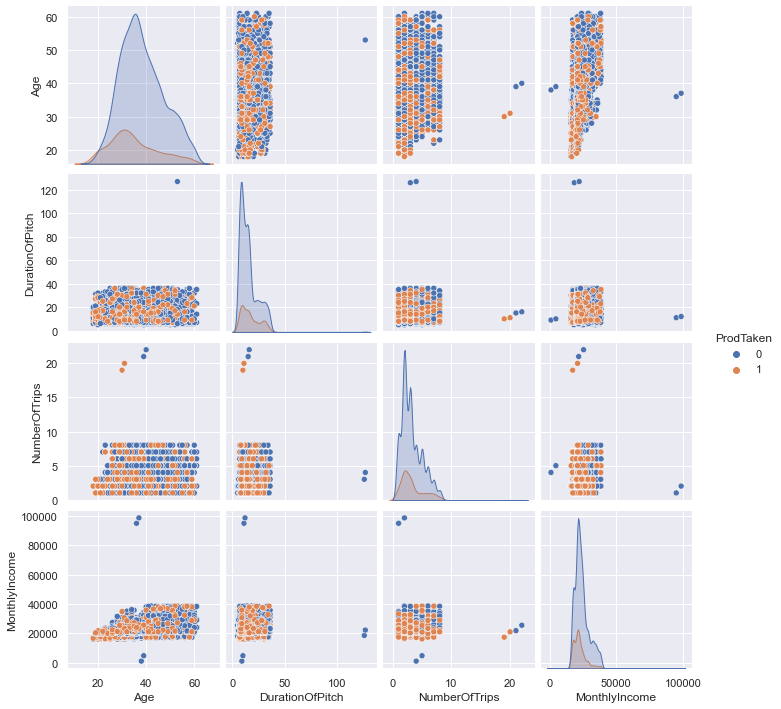

In [13]:
# Pairplot for continuous columns
sns.pairplot(data[con_col], diag_kind='kde', hue='ProdTaken');

### 4.4 Bivariate and Multivariate Analysis

In [14]:
# Get correlation matrix for numeric variables
data[con_col].corr()

ProdTaken       Age  DurationOfPitch  NumberOfTrips  \
ProdTaken         1.000000 -0.147254         0.078257       0.018898   
Age              -0.147254  1.000000        -0.012063       0.184905   
DurationOfPitch   0.078257 -0.012063         1.000000       0.009715   
NumberOfTrips     0.018898  0.184905         0.009715       1.000000   
MonthlyIncome    -0.130585  0.464869        -0.006252       0.139105   

                 MonthlyIncome  
ProdTaken            -0.130585  
Age                   0.464869  
DurationOfPitch      -0.006252  
NumberOfTrips         0.139105  
MonthlyIncome         1.000000

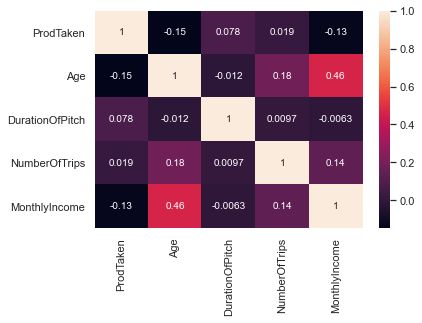

In [15]:
# Display correlation matrix in a heatmap
sns.heatmap(data[con_col].corr(), annot=True);

- Correlation between continuous variables is low
- Age and Monthly Income are positive correlated

#### 4.4.1 TypeofContact and ProdTaken

In [16]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,hue):
    tab = 100*pd.crosstab(x,hue,normalize='index').sort_values(by=hue[0])
    print(tab.T)
    tab.plot(kind='bar',stacked=True)

TypeofContact  Self Enquiry  Company Invited
ProdTaken                                   
0                 82.375145        78.153629
1                 17.624855        21.846371


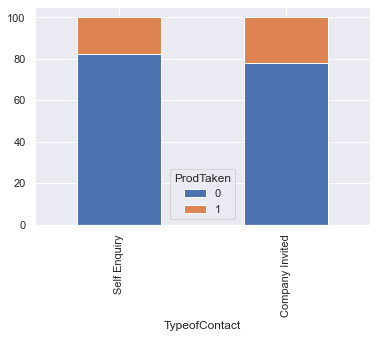

In [17]:
stacked_plot(data['TypeofContact'], data['ProdTaken'])

- 21.8% of company invited customers bought packages compared with only 17.6% of Self Inquiry customers

#### 4.4.2 CityTier and ProdTaken

CityTier          1          2     3
ProdTaken                           
0          83.69906  76.767677  76.4
1          16.30094  23.232323  23.6


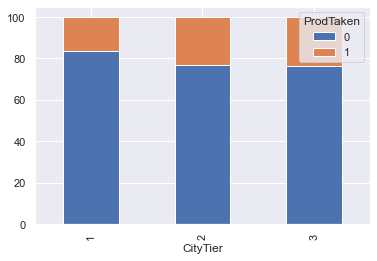

In [18]:
stacked_plot(data['CityTier'], data['ProdTaken'])

- 23% of customers in City Tiers 2 and 3 bought packages compared with only 16.3% of customers in City Tier 1

#### 4.4.3 Occupation and ProdTaken

Occupation   Salaried  Small Business  Large Business  Free Lancer
ProdTaken                                                         
0           82.516892       81.573896        72.35023          0.0
1           17.483108       18.426104        27.64977        100.0


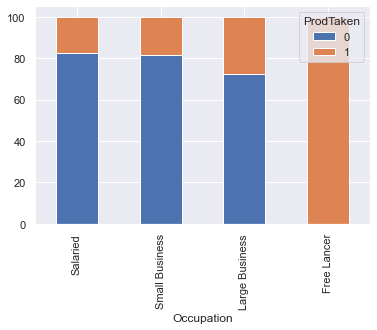

In [19]:
stacked_plot(data['Occupation'], data['ProdTaken'])

- Customers with Large Business bought more packages (27.6%) than customers with Salaried and Small Business
- The 2 Free Lancer customers bought a package

#### 4.4.4 Gender and ProdTaken

Gender       Fe Male    Female       Male
ProdTaken                                
0          83.870968  82.55366  80.178326
1          16.129032  17.44634  19.821674


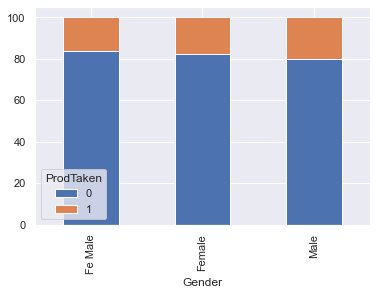

In [20]:
stacked_plot(data['Gender'], data['ProdTaken'])

- Male customers bought more packages in percentage than Female customers

#### 4.4.5 NumberOfPersonVisiting and ProdTaken

NumberOfPersonVisiting      1      5          4          2          3
ProdTaken                                                            
0                       100.0  100.0  81.189084  81.170663  80.849292
1                         0.0    0.0  18.810916  18.829337  19.150708


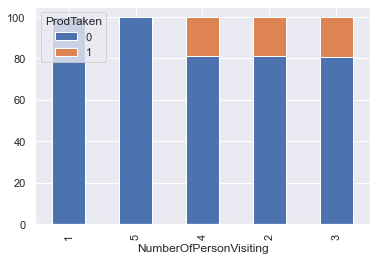

In [21]:
stacked_plot(data['NumberOfPersonVisiting'], data['ProdTaken'])

- None of the 6 customers with 1 and 5 person visiting bought a package
- The difference between 2, 3 and 4 person visiting is small in terms of percentage of customers buying a package

#### 4.4.6 NumberOfFollowups and ProdTaken

NumberOfFollowups        2.0        1.0        3.0        4.0        5.0  \
ProdTaken                                                                  
0                  89.519651  88.636364  83.356071  81.673114  75.130208   
1                  10.480349  11.363636  16.643929  18.326886  24.869792   

NumberOfFollowups        6.0  
ProdTaken                     
0                  60.294118  
1                  39.705882  


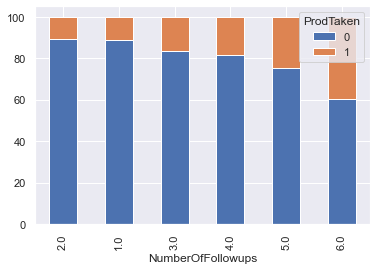

In [22]:
stacked_plot(data['NumberOfFollowups'], data['ProdTaken'])

- There is a clear trend between the number of follow-ups and the percentage of customers buying a package
- Customers with more follow-ups bought more packages than customers with low follow-ups

#### 4.4.7 Designation and ProdTaken

Designation        AVP         VP    Manager  Senior Manager  Executive
ProdTaken                                                              
0            94.152047  91.304348  88.221709        83.28841  70.032573
1             5.847953   8.695652  11.778291        16.71159  29.967427


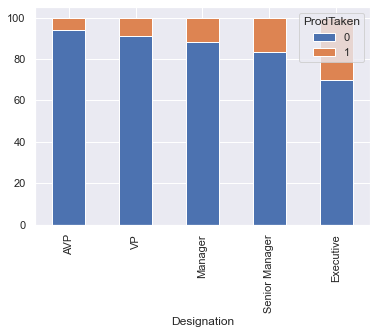

In [23]:
stacked_plot(data['Designation'], data['ProdTaken'])

- 29.9% Executive customers bought packages. These group has the highest percentage of all different Designations
- Only 5.8% of AVP customers and 8.6% of VP customers bought a package

#### 4.4.8 PreferredPropertyStar and ProdTaken

PreferredPropertyStar        3.0        4.0        5.0
ProdTaken                                             
0                      83.895757  80.065717  73.849372
1                      16.104243  19.934283  26.150628


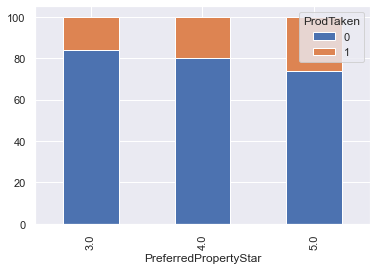

In [24]:
stacked_plot(data['PreferredPropertyStar'], data['ProdTaken'])

- There is a clear correspondence between rate of the hotel and the percentage of customers buying a package
- 26.1% of customers in 5 star hotels bought a package compared to 16.1% of customers in 3 star hotels

#### 4.4.9 MaritalStatus and ProdTaken

MaritalStatus   Divorced    Married  Unmarried     Single
ProdTaken                                                
0              86.947368  86.068376  75.659824  66.812227
1              13.052632  13.931624  24.340176  33.187773


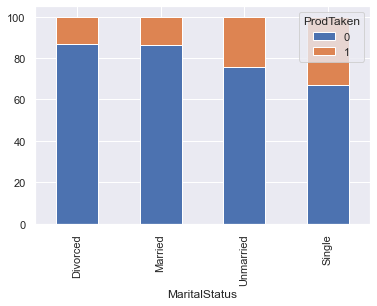

In [25]:
stacked_plot(data['MaritalStatus'], data['ProdTaken'])

- Single and Unmarried customers bought in percentage more packages than Divorced and Married customers

#### 4.4.10 Passport and ProdTaken

Passport           0          1
ProdTaken                      
0          87.709175  65.260197
1          12.290825  34.739803


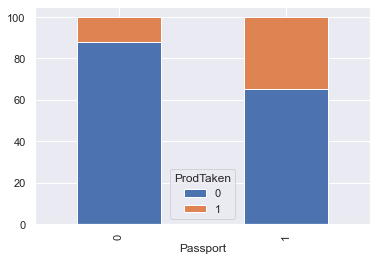

In [26]:
stacked_plot(data['Passport'], data['ProdTaken'])

- 34.7% of customers with passport bought a package compared to only 12.3% of customers without a passport

#### 4.4.11 PitchSatisfactionScore and ProdTaken

PitchSatisfactionScore          2          1          4          3          5
ProdTaken                                                                    
0                       84.982935  84.713376  82.236842  78.619756  78.350515
1                       15.017065  15.286624  17.763158  21.380244  21.649485


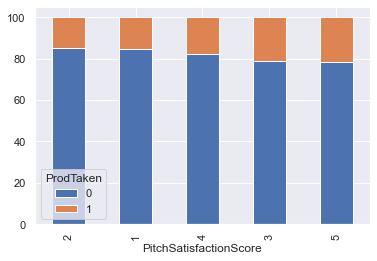

In [27]:
stacked_plot(data['PitchSatisfactionScore'], data['ProdTaken'])

- Customers with high pitch satisfaction score bought more packages than customers with low satisfaction score

#### 4.4.12 OwnCar and ProdTaken

OwnCar             1          0
ProdTaken                      
0          81.530343  80.603448
1          18.469657  19.396552


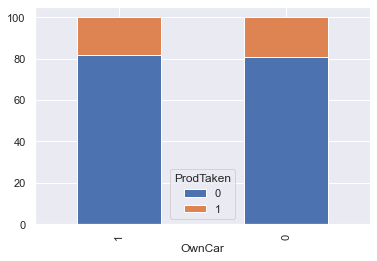

In [28]:
stacked_plot(data['OwnCar'], data['ProdTaken'])

- There is not a big difference between customers with and without a car

#### 4.4.13 NumberOfChildrenVisiting and ProdTaken

NumberOfChildrenVisiting        0.0        1.0        2.0        3.0
ProdTaken                                                           
0                         81.330869  81.153846  81.048689  79.692308
1                         18.669131  18.846154  18.951311  20.307692


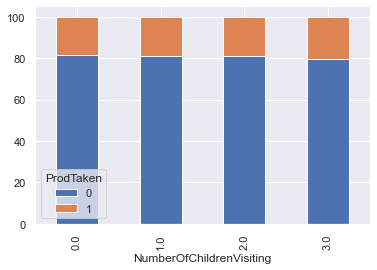

In [29]:
stacked_plot(data['NumberOfChildrenVisiting'], data['ProdTaken'])

- There is not an important difference for the number of children visiting in terms of customer buying a package 

#### 4.4.14 Age and ProdTaken

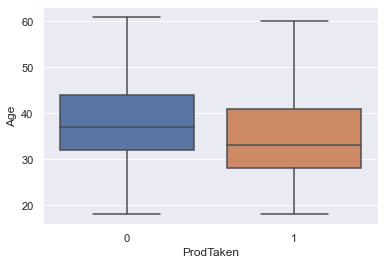

In [30]:
sns.boxplot(data['ProdTaken'], data['Age']);

- Customers than bought a package are younger on average than customers with out buying a package

#### 4.4.15 DurationOfPitch and ProdTaken

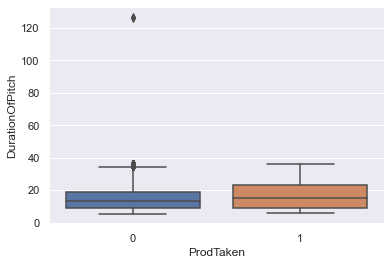

In [31]:
sns.boxplot(data['ProdTaken'], data['DurationOfPitch']);

- There is not a clear difference in terms of duration of pitch

#### 4.4.16 NumberOfTrips and ProdTaken

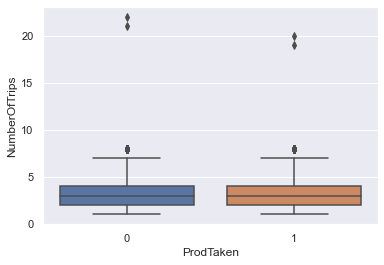

In [32]:
sns.boxplot(data['ProdTaken'], data['NumberOfTrips']);

- There is not a clear difference in terms of Number of Trips

#### 4.4.17 MonthlyIncome and ProdTaken

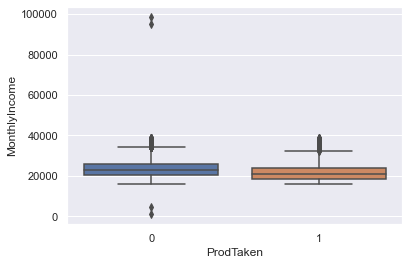

In [33]:
sns.boxplot(data['ProdTaken'], data['MonthlyIncome']);

- The range of Monthly Income of customers than bought a package is smaller than for customers without buying a package

### 4.5 Insights based on EDA

From the previous Exploratory Data Analysis, we can determine some characteristics of the customers that bought a package:
- Company Invited customers
- Customers in City Tiers 2 and 3
- Customers with Large Business or Free Lance customers
- Male customers
- Customers that receive several follow-ups, and with high sales pitch satisfaction score 
- Executive and Senior Manager customers
- Customers in 5 star hotels
- Single customers
- Customers with a passport

### 4.6 Customer Profile of different products

Now, we are going to analyze the characteristics of the customers that bought a package for each different product 

In [34]:
# data filtered by ProdTaken
data_prodtaken = data[data['ProdTaken']==1]

#### 4.6.1 Designation and ProductPitched

In [35]:
# pivot table to calculate number of customers in all Designation, Product Pitched combination
pd.pivot_table(data, values='CustomerID', index=['ProductPitched'], columns=['Designation'], aggfunc='count')

Designation       AVP  Executive  Manager  Senior Manager     VP
ProductPitched                                                  
Basic             NaN     1842.0      NaN             NaN    NaN
Deluxe            NaN        NaN   1732.0             NaN    NaN
King              NaN        NaN      NaN             NaN  230.0
Standard          NaN        NaN      NaN           742.0    NaN
Super Deluxe    342.0        NaN      NaN             NaN    NaN

- There is a direct correspondence between Designation and ProductPitched. 
    - Basic - Executive
    - Deluxe - Manager
    - King - VP
    - Standard - Senior Manager
    - Super Deluxe - AVP
- We can drop Designation column and keep ProductPitched

#### 4.6.2 TypeofContact and ProductPitched

ProductPitched   Super Deluxe      Basic     Deluxe   Standard   King
TypeofContact                                                        
Company Invited          80.0  35.336976  33.333333  25.806452    0.0
Self Enquiry             20.0  64.663024  66.666667  74.193548  100.0


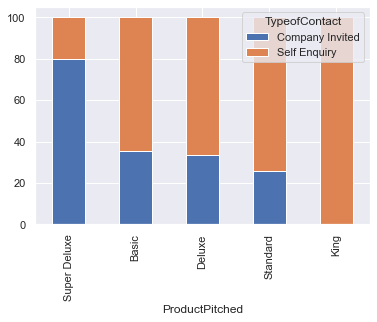

In [36]:
stacked_plot(data['ProductPitched'], data_prodtaken['TypeofContact'])

- Self Inquiry customers bought in percentage more Basic, Deluxe, Standard and King products than Company Invited
- Company Invited customers bought in percentage more Super Deluxe product than Self Inquiry

#### 4.6.3 CityTier and ProductPitched

ProductPitched      Basic       King  Super Deluxe   Standard     Deluxe
CityTier                                                                
1               79.587405  73.043478     61.988304  58.760108  52.424942
2                5.863192   9.565217      2.923977   2.425876   2.309469
3               14.549403  17.391304     35.087719  38.814016  45.265589


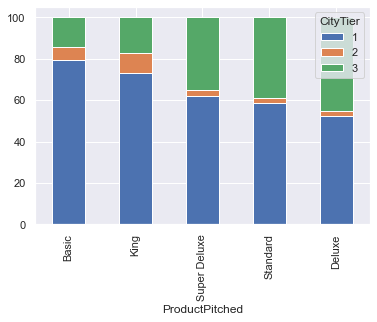

In [37]:
stacked_plot(data['ProductPitched'], data['CityTier'])

- Customers in City Tier 1 bought in percentage more Basic, King, Super Deluxe and Standard products than customers in City Tier 1 and 2
- Customers for Deluxe product are in similar proportions in City Tier 1 and 3

#### 4.6.4 Occupation and ProductPitched

ProductPitched   Standard     Deluxe       King      Basic  Super Deluxe
Occupation                                                              
Free Lancer      0.000000   0.000000   0.000000   0.108578      0.000000
Large Business  11.320755   7.159353   5.217391  10.640608      5.263158
Salaried        45.552561  47.228637  49.565217  50.162866     50.877193
Small Business  43.126685  45.612009  45.217391  39.087948     43.859649


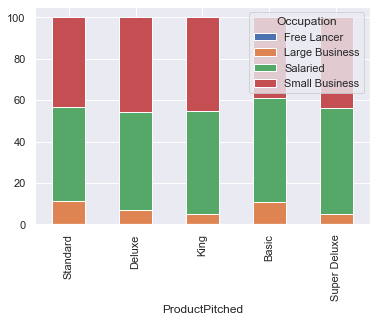

In [38]:
stacked_plot(data['ProductPitched'], data['Occupation'])

- The share of customers for the different products is similar in terms of Occupation

#### 4.6.5 Gender and ProductPitched

ProductPitched   Standard       King      Basic     Deluxe  Super Deluxe
Gender                                                                  
Fe Male          8.490566   0.000000   0.217155   4.792148      1.461988
Female          35.444744  35.652174  36.699240  37.009238     45.321637
Male            56.064690  64.347826  63.083605  58.198614     53.216374


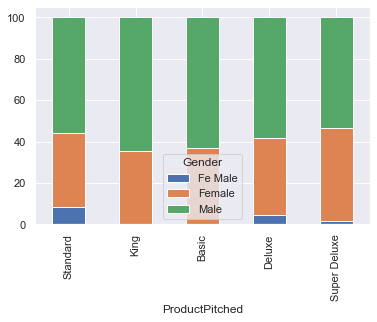

In [39]:
stacked_plot(data['ProductPitched'], data['Gender'])

- Male customers bought more products than Female customers. However, the share is more similar in Standard and Super Deluxe products

#### 4.6.6 ProductPitched and NumberOfPersonVisiting

ProductPitched          Super Deluxe   Standard     Deluxe      Basic  \
NumberOfPersonVisiting                                                  
1                           1.754386   0.943396   0.981524   0.488599   
2                          30.994152  28.167116  29.503464  28.067318   
3                          48.245614  48.921833  48.960739  49.457112   
4                          19.005848  21.832884  20.496536  21.932682   
5                           0.000000   0.134771   0.057737   0.054289   

ProductPitched               King  
NumberOfPersonVisiting             
1                        0.000000  
2                       32.608696  
3                       50.000000  
4                       17.391304  
5                        0.000000  


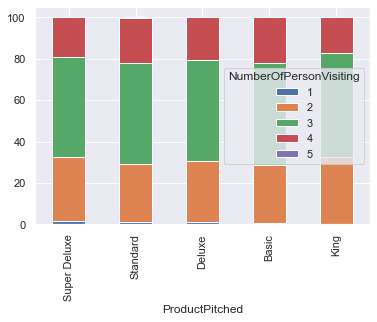

In [40]:
stacked_plot(data['ProductPitched'], data['NumberOfPersonVisiting'])

- There is not a big difference for the different products in terms of Number of Person Visiting

#### 4.6.7 ProductPitched and NumberOfFollowups

ProductPitched      Standard     Deluxe      Basic  Super Deluxe       King
NumberOfFollowups                                                          
1.0                 2.291105   3.823529   3.936577      5.263158   1.739130
2.0                 3.099730   5.058824   5.030071      6.432749   2.608696
3.0                29.784367  29.941176  30.399125     30.701754  32.608696
4.0                44.878706  42.588235  41.935484     42.105263  43.478261
5.0                17.924528  15.470588  15.746309     14.035088  15.652174
6.0                 2.021563   3.117647   2.952433      1.461988   3.913043


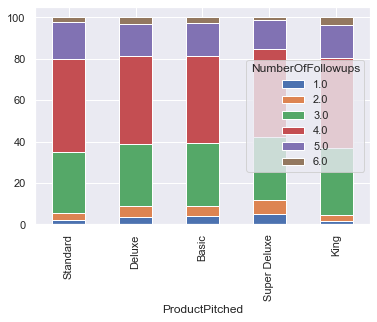

In [41]:
stacked_plot(data['ProductPitched'], data['NumberOfFollowups'])

- There is not a big difference for the different products in terms of Number of Follow-ups

#### 4.6.8 ProductPitched and PreferredPropertyStar

ProductPitched          Standard      Basic  Super Deluxe     Deluxe  \
PreferredPropertyStar                                                  
3.0                    58.839406  60.727865     61.988304  62.969382   
4.0                    17.543860  19.989136     18.128655  18.024263   
5.0                    23.616734  19.282998     19.883041  19.006355   

ProductPitched              King  
PreferredPropertyStar             
3.0                    66.183575  
4.0                    19.806763  
5.0                    14.009662  


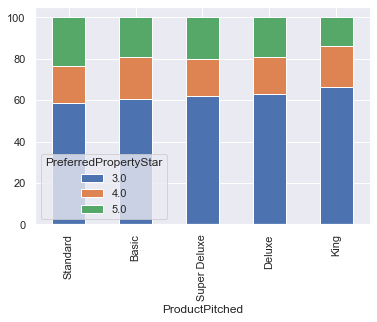

In [42]:
stacked_plot(data['ProductPitched'],data['PreferredPropertyStar'])

- There is a clear correspondence between rate of the hotel and product 
- Customers in 3-star hotels have a higher share in King, Deluxe and Super Deluxe products than Standard and Basic products
- Customers in 5-star hotels have a higher share in Standard and Basic products than King, Deluxe and Super Deluxe products

#### 4.6.9 ProductPitched and MaritalStatus

ProductPitched   Standard     Deluxe       King  Super Deluxe      Basic
MaritalStatus                                                           
Divorced        19.137466  19.399538  22.608696     25.730994  18.023887
Married         51.212938  49.191686  54.782609     48.538012  44.299674
Single           6.738544  12.759815  22.608696     23.976608  27.741585
Unmarried       22.911051  18.648961   0.000000      1.754386   9.934853


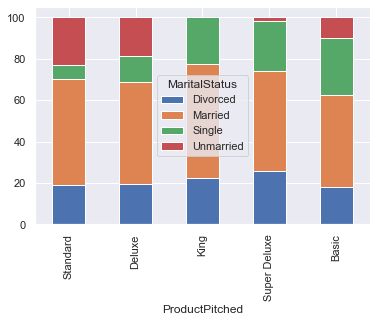

In [43]:
stacked_plot(data['ProductPitched'], data['MaritalStatus'])

- Shares are similar taking into account than Single and Unmarried could belong to the same group

#### 4.6.10 ProductPitched and Passport

ProductPitched       King     Deluxe   Standard  Super Deluxe      Basic
Passport                                                                
0               73.913043  72.286374  71.698113     69.590643  69.163952
1               26.086957  27.713626  28.301887     30.409357  30.836048


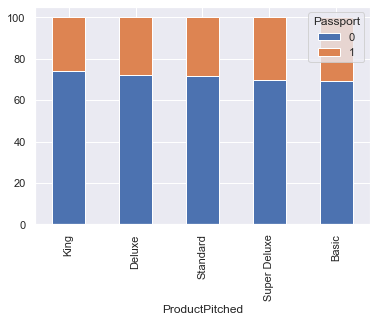

In [44]:
stacked_plot(data['ProductPitched'], data['Passport'])

- There is not a clear difference between customers with and without a Passport

#### 4.6.11 ProductPitched and PitchSatisfactionScore

ProductPitched          Super Deluxe      Basic     Deluxe   Standard  \
PitchSatisfactionScore                                                  
1                          13.450292  19.435396  20.323326  19.676550   
2                           7.602339  11.074919  12.702079  13.746631   
3                          36.842105  29.858849  31.870670  27.223720   
4                          14.035088  21.172638  16.166282  19.407008   
5                          28.070175  18.458198  18.937644  19.946092   

ProductPitched               King  
PitchSatisfactionScore             
1                       17.391304  
2                       14.782609  
3                       20.869565  
4                       21.739130  
5                       25.217391  


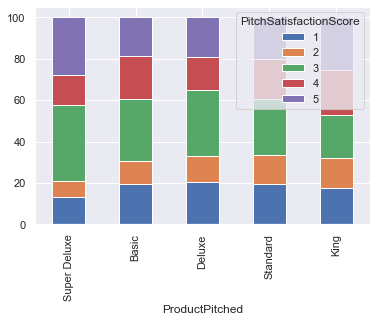

In [45]:
stacked_plot(data['ProductPitched'], data['PitchSatisfactionScore'])

- Customers with high pitch satisfaction score (4 and 5) bought more in percentage King and Super Deluxe Packages

#### 4.4.12 ProductPitched and OwnCar

ProductPitched      Basic    Deluxe   Standard  Super Deluxe       King
OwnCar                                                                 
0               41.150923  38.91455  34.770889     29.824561  27.826087
1               58.849077  61.08545  65.229111     70.175439  72.173913


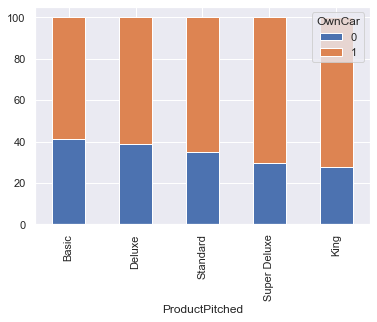

In [46]:
stacked_plot(data['ProductPitched'], data['OwnCar'])

- The share of customers without a car decreases from Basic and Deluxe to Super Deluxe and King

#### 4.6.13 ProductPitched and NumberOfChildrenVisiting

ProductPitched                 King      Basic     Deluxe   Standard  \
NumberOfChildrenVisiting                                               
0.0                       14.832536  21.944595  22.588099  23.211876   
1.0                       42.583732  43.074416  43.558637  42.914980   
2.0                       34.449761  28.082564  27.383016  26.720648   
3.0                        8.133971   6.898425   6.470248   7.152497   

ProductPitched            Super Deluxe  
NumberOfChildrenVisiting                
0.0                          28.000000  
1.0                          42.000000  
2.0                          24.666667  
3.0                           5.333333  


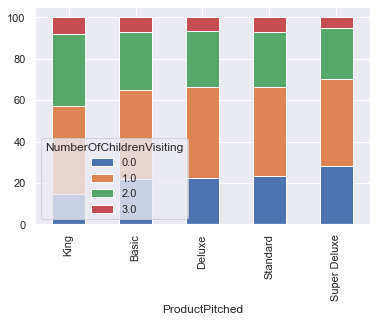

In [47]:
stacked_plot(data['ProductPitched'], data['NumberOfChildrenVisiting'])

- Customers with 0 children bought in percentage more Super Deluxe and Standard products than in King and Basic products
- Customers with 2 and 3 children bought in percentage more King and Basic than Super Deluxe and Standard products

#### 4.6.14 ProductPitched and Age

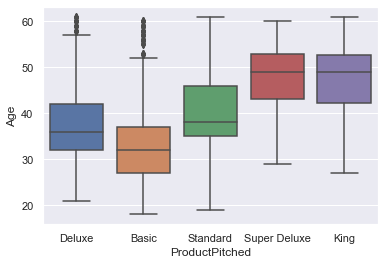

In [48]:
sns.boxplot(data['ProductPitched'], data['Age']);

- Super Deluxe and King customers are older than Basic and Deluxe customers
- Standard customers are in the whole Age range

#### 4.6.15 DurationOfPitch and ProductPitched

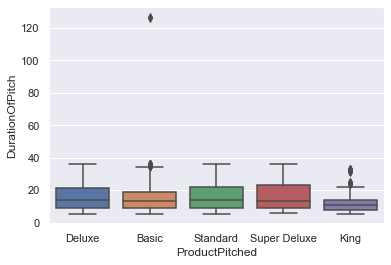

In [49]:
sns.boxplot(data['ProductPitched'], data['DurationOfPitch']);

- There is not a clear difference in terms of duration of pitch

#### 4.6.16 NumberOfTrips and ProductPitched

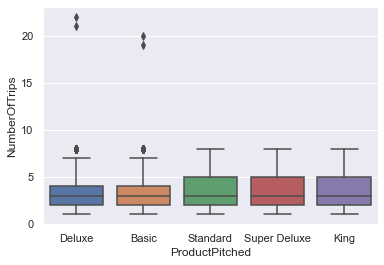

In [50]:
sns.boxplot(data['ProductPitched'], data['NumberOfTrips']);

- There is not a clear difference in terms of Number of Trips

#### 4.6.17 MonthlyIncome and ProductPitched

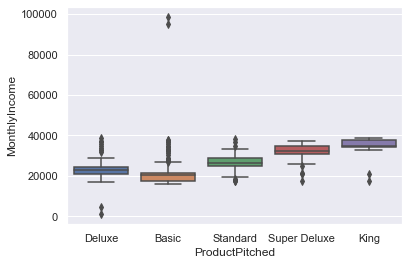

In [51]:
sns.boxplot(data['ProductPitched'], data['MonthlyIncome']);

- Super Deluxe and King customers have higher Income than Deluxe and Basic customers

#### 4.6.18 Insights for Customer Profile

These are the main characteristics of the customers that bought the different packages

- **Deluxe**
    - All are Manager customers
    - Mostly Self Inquiry customers
    - Customers in City Tier 1 and Tier 3
    - Mostly Male customers
    - Mostly customers in 3-star hotels
    - Mostly customers without passports
    - Mostly customers with car
    - Mostly customers with 1 or no child
    - More young customers
    - Low income customers
- **Basic**
    - All are Executive customers
    - Mostly Self Inquiry customers
    - Mostly customers in City Tier 1
    - Mostly Male customers
    - Slightly more customers in 3-star hotels
    - Mostly customers without passports
    - Mostly customers with car
    - Mostly customers with 1 or no child
    - More young customers
    - Low income customers
- **Standard**
    - All are Senior Manager customers
    - Mostly Self Inquiry customers
    - Mostly customers in City Tier 1
    - Slightly more Male customers
    - Slightly more customers in 3-star hotels
    - Mostly customers without passports
    - Mostly customers with car
    - Mostly customers with 1 or no child
- **Super Deluxe**
    - All are AVP customers
    - Mostly Company Invited customers
    - Mostly customers in City Tier 1
    - Slightly more Male customers
    - Mostly customers in 3-star hotels
    - Mostly customers without passports
    - Mostly customers with car
    - Mostly customers with 1 or no child
    - More old customers 
    - High income customers
- **King**
    - All are VP customers
    - Mostly Self Inquiry customers
    - Mostly customers in City Tier 1
    - Mostly Male customers
    - Mostly customers in 3-star hotels
    - Mostly customers without passports 
    - Mostly customers with car
    - Mostly customers with 1 or no child
    - More old customers
    - High income customers

## 5 Data Pre-Processing

### 5.1 Feature Engineering
- Drop CustomerID column
- Drop Designation column due to perfect correlation with ProductPitched column
- Correct "Fe Male" values with "Female" in Gender column
- Convert "Unmarried" to "Single" in MaritalStatus column
- Convert TypeofContact, Occupation, Gender, MaritalStatus, ProductPitched to category columns 
- Convert DurationOfPitch to numeric column

In [52]:
# Drop CustomerID column
data.drop(['CustomerID'], axis=1, inplace=True)
# Drop Designation column
data.drop(['Designation'], axis=1, inplace=True)

In [53]:
# This function correct 'Fe Male' values in Gender column
def correct_gender(gender):
    if gender == 'Fe Male':
        gender = 'Female'
    return gender

# apply correct_gender function to column 'Gender'
data['Gender'] = data['Gender'].apply(correct_gender)

In [54]:
# check Gender column
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [55]:
# This function convert "Unmarried" to "Single" in MaritalStatus column
def convert_unmarried(mstatus):
    if mstatus == 'Unmarried':
        mstatus = 'Single'
    return mstatus

# apply convert_unmarried function to column 'MaritalStatus'
data['MaritalStatus'] = data['MaritalStatus'].apply(convert_unmarried)

In [56]:
# check MaritalStatus column
data['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [57]:
# convert columns to category column
data['TypeofContact']=data['TypeofContact'].astype('category')
data['Occupation']=data['Occupation'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['MaritalStatus']=data['MaritalStatus'].astype('category')
data['ProductPitched']=data['ProductPitched'].astype('category')

# convert columns to numeric column
data['DurationOfPitch']=data['DurationOfPitch'].astype('float')

In [58]:
# check data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   int64 

### 5.2 Missing value treatment
#### 5.2.1 Missing value analysis

In [59]:
# check dataset missing values
total = data.isnull().sum().sort_values(ascending=False) # total number of null values
print(total)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64


From the columns with missing data, `TypeofContact` is categorical while `DurationOfPitch`, `MonthlyIncome`, `Age`, `NumberOfTrips`, `NumberOfChildrenVisiting`, `NumberOfFollowups`, `PreferredPropertyStar` are numerical columns

In [60]:
# counting the number of missing values per row
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    4128
1     533
2     202
3      25
dtype: int64

We are going to analyze if there is a pattern for the 25 rows with 3 missing values

In [61]:
data[num_missing == 3]

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
224           0  31.0           NaN         1              NaN   
571           0  26.0           NaN         1              NaN   
572           0  29.0           NaN         1              NaN   
576           0  27.0           NaN         3              NaN   
579           0  34.0           NaN         1              NaN   
598           1  28.0           NaN         1              NaN   
622           0  32.0           NaN         3              NaN   
724           0  24.0           NaN         1              NaN   
843           0  26.0           NaN         1              NaN   
1021          1  25.0           NaN         3              NaN   
1047          0  33.0           NaN         3              NaN   
1143          0  45.0           NaN         3              NaN   
1182          0  36.0           NaN         1              NaN   
1217          0  24.0           NaN         1              NaN   
1356          0  41.0           NaN         3              NaN   
1469          0  34.0           NaN         1              NaN   
1694          0  31.0           NaN         1              NaN   
2041          0  26.0           NaN         1              NaN   
2042          0  29.0           NaN         1              NaN   
2046          0  27.0           NaN         3              NaN   
2049          0  34.0           NaN         1              NaN   
2068          1  28.0           NaN         1              NaN   
2092          0  32.0           NaN         3              NaN   
2194          0  24.0           NaN         1              NaN   
2313          0  26.0           NaN         1              NaN   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
224   Small Business    Male                       2                5.0   
571         Salaried  Female                       3                5.0   
572   Small Business  Female                       3                3.0   
576   Small Business    Male                       2                3.0   
579   Small Business  Female                       2                4.0   
598   Small Business    Male                       2                3.0   
622         Salaried    Male                       3                3.0   
724   Small Business  Female                       2                4.0   
843   Small Business    Male                       2                1.0   
1021        Salaried    Male                       3                4.0   
1047  Small Business    Male                       2                3.0   
1143  Small Business    Male                       2                4.0   
1182  Small Business  Female                       2                4.0   
1217  Small Business    Male                       3                1.0   
1356  Small Business  Female                       2                3.0   
1469  Small Business    Male                       2                1.0   
1694  Small Business    Male                       2                5.0   
2041        Salaried  Female                       3                5.0   
2042  Small Business  Female                       3                3.0   
2046  Small Business    Male                       2                3.0   
2049  Small Business  Female                       2                4.0   
2068  Small Business    Male                       2                3.0   
2092        Salaried    Male                       3                3.0   
2194  Small Business  Female                       2                4.0   
2313  Small Business    Male                       2                1.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
224          Deluxe                    3.0      Divorced            1.0   
571           Basic                    3.0       Married            4.0   
572          Deluxe                    3.0      Divorced            5.0   
576          Deluxe                   

For these 25 rows, the 3 missing columns are: TypeofContact, DurationOfPitch and MonthlyIncome

Now, we are going to get the columns with missing values

In [62]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'Rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n')

Rows with exactly 1 missing values, NAs are found in:
Age                          96
DurationOfPitch             154
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome                 6
dtype: int64


Rows with exactly 2 missing values, NAs are found in:
Age                130
DurationOfPitch     72
MonthlyIncome      202
dtype: int64


Rows with exactly 3 missing values, NAs are found in:
TypeofContact      25
DurationOfPitch    25
MonthlyIncome      25
dtype: int64




#### 5.2.2 Missing value imputation
- We are going to impute the numeric columns with missing values with the k-Nearest Neighbors using KKNImputer
- We select the k-Nearest Neighbors instead of the mean to avoid the influence of outliers in those columns
- For TypeOfContact column we are going to use the mode

In [63]:
# load KNNImputer 
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [64]:
# create data set with only numeric columns
data_n = data.select_dtypes(include=np.number)
data_n_cols = data_n.columns.tolist()
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   CityTier                  4888 non-null   int64  
 3   DurationOfPitch           4637 non-null   float64
 4   NumberOfPersonVisiting    4888 non-null   int64  
 5   NumberOfFollowups         4843 non-null   float64
 6   PreferredPropertyStar     4862 non-null   float64
 7   NumberOfTrips             4748 non-null   float64
 8   Passport                  4888 non-null   int64  
 9   PitchSatisfactionScore    4888 non-null   int64  
 10  OwnCar                    4888 non-null   int64  
 11  NumberOfChildrenVisiting  4822 non-null   float64
 12  MonthlyIncome             4655 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 496.6 KB


In [65]:
# input values with KNNImputer
data_n = pd.DataFrame(imputer.fit_transform(data_n), columns=data_n_cols)
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   float64
 1   Age                       4888 non-null   float64
 2   CityTier                  4888 non-null   float64
 3   DurationOfPitch           4888 non-null   float64
 4   NumberOfPersonVisiting    4888 non-null   float64
 5   NumberOfFollowups         4888 non-null   float64
 6   PreferredPropertyStar     4888 non-null   float64
 7   NumberOfTrips             4888 non-null   float64
 8   Passport                  4888 non-null   float64
 9   PitchSatisfactionScore    4888 non-null   float64
 10  OwnCar                    4888 non-null   float64
 11  NumberOfChildrenVisiting  4888 non-null   float64
 12  MonthlyIncome             4888 non-null   float64
dtypes: float64(13)
memory usage: 496.6 KB


In [66]:
# replace columns with new imputed columns
for feature in data_n_cols:
    data[feature] = data_n[feature]

In [67]:
# input TypeofContact column with the most frequent value (mode imputation)
data['TypeofContact'][data['TypeofContact'].isna()]='Self Enquiry'

In [68]:
# Check there are not missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   float64 
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   float64 
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   float64 
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   float6

### 5.3 Outliers detection
We are going to analyze the outliers in DurationOfPitch, MonthlyIncome and NumberOfTrips columns

In [69]:
# This function create a plot with the boxplot and distribution of the series
def histboxplot(feature):
    # creating the 2 subplots
    f2, (ax_box1, ax_hist1) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           ncols = 1, # Number of Columns of the subplot grid= 1
                                           sharex = 'col', # x-axis will be shared among columns
                                           figsize = (7,6),
                                           gridspec_kw = {"height_ratios": (.25, .75)});
    sns.boxplot(feature, ax=ax_box1, showmeans=True, color='violet'); # boxplot 
    sns.distplot(feature, kde=True, ax=ax_hist1); # histogram
    ax_hist1.axvline(np.mean(feature), color='green', linestyle='--'); # Add mean to the histogram
    ax_hist1.axvline(np.median(feature), color='black', linestyle='-');
    

# This function treats the outliers in a variable
def treat_outliers(feature, lower, upper):
    # all the values smaller than lower will be assigned value of lower 
    # and all the values above upper will be assigned value of upper
    feature = np.clip(feature, Lower_Whisker, Upper_Whisker)
    return feature

#### 5.3.1 DurationOfPitch

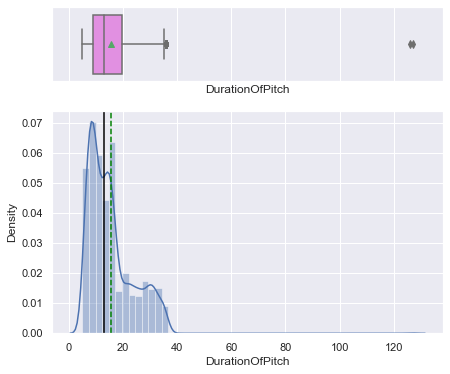

In [70]:
histboxplot(data['DurationOfPitch'])

DurationOfPitch has several outliers. All values above 37 are going to be clipped

In [71]:
data['DurationOfPitch']=np.clip(data['DurationOfPitch'], 0, 37)

#### 5.3.2 MonthlyIncome

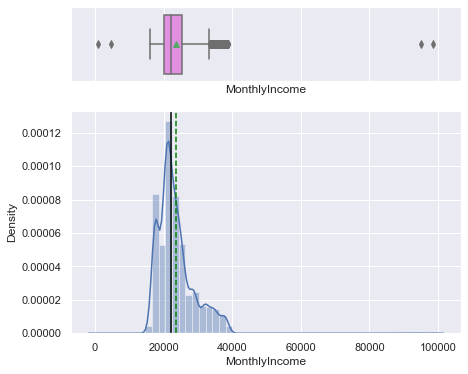

In [72]:
histboxplot(data['MonthlyIncome'])

MonthlyIncome has several outliers. All values below 15000 and above 40000 are going to be clipped

In [73]:
data['MonthlyIncome']=np.clip(data['MonthlyIncome'], 15000, 40000)

#### 5.3.3 NumberOfTrips

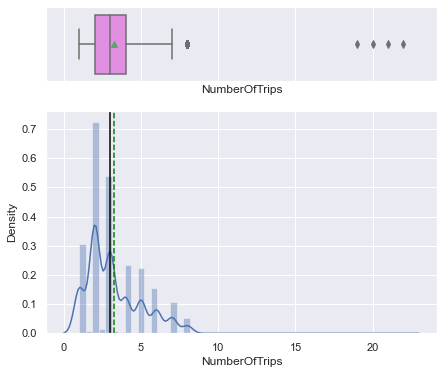

In [74]:
histboxplot(data['NumberOfTrips'])

NumberOfTrips has values above 10. However, it is possible for a customer to have more than 10 trips in a year. Therefore, we are not going to modify these values

### 5.4 Data Preparation

#### 5.4.1 Creating training and test data sets

In [75]:
# create independent variables
X = data.drop(['ProdTaken'], axis=1)
# create dependent variable
Y = data['ProdTaken']

# hot encoding for categorical variables
X = pd.get_dummies(X,drop_first=True)

In [76]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1, stratify=Y)

In [77]:
print(f'Shape of Training set: {X_train.shape}')
print(f'Shape of Test set: {X_test.shape}')
print(f'Percentage of classes in Training set\n{y_train.value_counts(normalize=True)}')
print(f'Percentage of classes in Test set\n{y_test.value_counts(normalize=True)}')

Shape of Training set: (3421, 23)
Shape of Test set: (1467, 23)
Percentage of classes in Training set
0.0    0.811751
1.0    0.188249
Name: ProdTaken, dtype: float64
Percentage of classes in Test set
0.0    0.811861
1.0    0.188139
Name: ProdTaken, dtype: float64


Both, training set and test set have similar ratios of classes for ProdTaken

## 6 Models evaluation criteria

### 6.1 Insights:

- **True Positives:**
    - Reality: The customer purchased a package
    - Model predicted: The customer purchases a package
    - Outcome: The model is good, and company is targeting the proper costumers

- **True Negatives:**
    - Reality: The customer did not purchase a package
    - Model predicted: The customer does not purchase a package
    - Outcome: The company can avoid targeting these customers

- **False Positives:**
    - Reality: The customer did not purchase a package
    - Model predicted:  The customer purchases a package
    - Outcome: The company is wasting resources on the customers who will not buy a package

- **False Negatives:**
    - Reality: The customer purchased a package
    - Model predicted: The customer does not purchase a package
    - Outcome: The potential customer is missed by `Visit with us`, and the business would not grow

#### 6.1.1 Model can make wrong predictions as:
1. Predicting a customer has purchased a package but actually the customer does not purchase a package
2. Predicting a customer does not purchased a package but actually the customer purchase a package

#### 6.1.2 Which case is more important? 
- Both cases are important because we want to identify the customers that will buy a package without wasting resources in marketing cost

#### 6.1.3 How to reduce this loss?
*  `F1-score` should be used as a measured of the model performance. High f1-score implies both low False Negatives and low False Positives

### 6.2 Functions to evaluate models
- metrics_score: check the model performance of models. 
- make_confusion_matrix: plot confusion matrix.

In [78]:
def metrics_score(model,train,test,train_y,test_y,threshold=0.5,model_name=''):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    model_name: name of model
    '''
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    score_dict = {'Model':model_name,
                  'Accuracy on training set' : accuracy_score(pred_train,train_y),
                  'Accuracy on test set': accuracy_score(pred_test,test_y),
                  'Recall on training set': recall_score(train_y,pred_train),
                  'Recall on test set': recall_score(test_y,pred_test),
                  'Precision on training set': precision_score(train_y,pred_train),
                  'Precision on test set': precision_score(test_y,pred_test),
                  'F1 on training set': f1_score(train_y,pred_train),
                  'F1 on test set': f1_score(test_y,pred_test)
                 }
    return score_dict # returning dictionary with scores

In [79]:
def make_confusion_matrix(model,test_X,y_actual,threshold=0.5,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    threshold: thresold for classifiying the observation as 1
    '''
    y_predict = (model.predict_proba(test_X)[:, 1] > threshold).astype('float')
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, 
                         index = ['Actual - Prod Taken','Actual - No Prod Taken'],
                         columns = ['Predicted-Prod Taken','Predicted-No Prod Taken'])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_labels = ['(TP)', '(FN)', '(FP)', '(TN)']
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_counts,group_percentages,group_labels)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (8,6))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 7 Model building - Bagging
### 7.1 Decision tree model

* We will build our model using the DecisionTreeClassifier function, and using default 'gini' criteria to split
* The decision tree will give more weight to class 1 since our goal is to identify correctly customers with Personal Loan (class 1). We are going to pass a dictionary {0:0.18,1:0.82} to the hyperparameter class_weight to specify the weight of each class

In [80]:
model_dt = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.18, 1: 0.82}, random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.82}, random_state=1)

In [81]:
# checking model performances for this model
scores = metrics_score(model_dt,X_train,X_test,y_train,y_test,model_name='Decision Tree')
scores = pd.DataFrame(scores,index=[0])
scores

Model  Accuracy on training set  Accuracy on test set  \
0  Decision Tree                       1.0              0.884117   

   Recall on training set  Recall on test set  Precision on training set  \
0                     1.0            0.702899                        1.0   

   Precision on test set  F1 on training set  F1 on test set  
0               0.687943                 1.0        0.695341

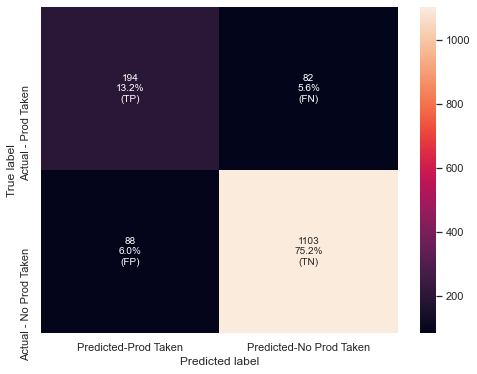

In [82]:
# creating confusion matrix
make_confusion_matrix(model_dt,X_test,y_test)

- This Decision Tree model has a overfitting problem. All measures (Accuracy, Recall, Precision, f1-value) are equal to 1 in the training set, but they lower than 1 in the test set
-  Recall, Precision and F1-score are very low on test set

### 7.2 Bagging classifier
#### 7.2.1 Bagging 

In [83]:
model_bagging = BaggingClassifier(random_state=1)
model_bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [84]:
# checking model performances for this model
scores_bagging = metrics_score(model_bagging,X_train,X_test,y_train,y_test,model_name='Bagging Classifier')
scores = scores.append(scores_bagging, ignore_index=True)
scores

Model  Accuracy on training set  Accuracy on test set  \
0       Decision Tree                  1.000000              0.884117   
1  Bagging Classifier                  0.995323              0.912747   

   Recall on training set  Recall on test set  Precision on training set  \
0                1.000000            0.702899                        1.0   
1                0.975155            0.597826                        1.0   

   Precision on test set  F1 on training set  F1 on test set  
0               0.687943            1.000000        0.695341  
1               0.906593            0.987421        0.720524

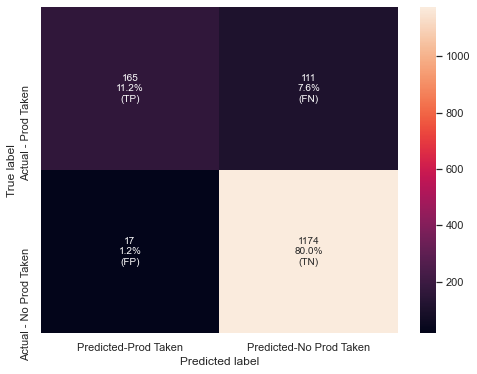

In [85]:
# creating confusion matrix
make_confusion_matrix(model_bagging,X_test,y_test)

- This bagging classifier model has a overfitting problem
- Recall and F1-score on test set are very low

#### 7.2.2 Bagging Classifier with weighted decision tree

In [86]:
model_bagging_dt = BaggingClassifier(
                        base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.18,1:0.82},random_state=1),
                        random_state=1)
model_bagging_dt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.18,
                                                                      1: 0.82},
                                                        random_state=1),
                  random_state=1)

In [87]:
# checking model performances for this model
scores_bagging_dt = metrics_score(model_bagging_dt,X_train,X_test,y_train,y_test,model_name='Bagging Classifier with Weights')
scores = scores.append(scores_bagging_dt, ignore_index=True)
scores

Model  Accuracy on training set  \
0                    Decision Tree                  1.000000   
1               Bagging Classifier                  0.995323   
2  Bagging Classifier with Weights                  0.994154   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.884117                1.000000            0.702899   
1              0.912747                0.975155            0.597826   
2              0.901159                0.968944            0.525362   

   Precision on training set  Precision on test set  F1 on training set  \
0                        1.0               0.687943            1.000000   
1                        1.0               0.906593            0.987421   
2                        1.0               0.911950            0.984227   

   F1 on test set  
0        0.695341  
1        0.720524  
2        0.666667

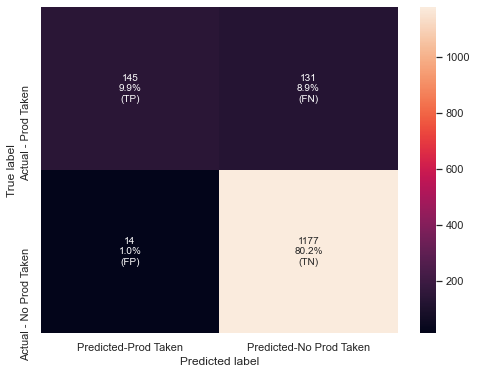

In [88]:
# creating confusion matrix
make_confusion_matrix(model_bagging_dt,X_test,y_test)

- This bagging classifier model with weighted decision tree has overfitting problems
- Recall and F1-score on test set are very low

### 7.3 Random Forest
#### 7.3.1 Random Forest

In [89]:
model_random_forest = RandomForestClassifier(random_state=1)
model_random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [90]:
# checking model performances for this model
scores_random_forest = metrics_score(model_random_forest,X_train,X_test,y_train,y_test,model_name='Random Forest')
scores = scores.append(scores_random_forest, ignore_index=True)
scores

Model  Accuracy on training set  \
0                    Decision Tree                  1.000000   
1               Bagging Classifier                  0.995323   
2  Bagging Classifier with Weights                  0.994154   
3                    Random Forest                  1.000000   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.884117                1.000000            0.702899   
1              0.912747                0.975155            0.597826   
2              0.901159                0.968944            0.525362   
3              0.909339                1.000000            0.547101   

   Precision on training set  Precision on test set  F1 on training set  \
0                        1.0               0.687943            1.000000   
1                        1.0               0.906593            0.987421   
2                        1.0               0.911950            0.984227   
3                        1.0               0.949686            1.000000   

   F1 on test set  
0        0.695341  
1        0.720524  
2        0.666667  
3        0.694253

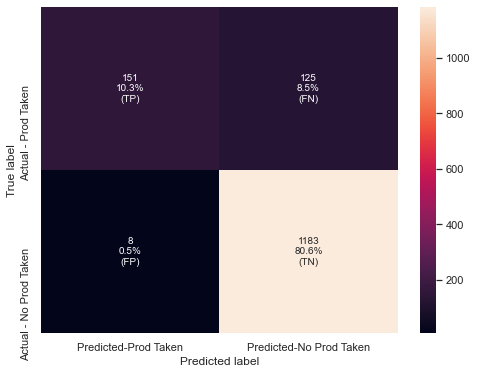

In [91]:
# creating confusion matrix
make_confusion_matrix(model_random_forest,X_test,y_test)

- This Random Forest model has overfitting problems
- Recall and F1-score on test set are very low

#### 7.3.2 Random forest with class weights

In [92]:
model_random_forest_wt = RandomForestClassifier(class_weight={0:0.18,1:0.82}, random_state=1)
model_random_forest_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, random_state=1)

In [93]:
# checking model performances for this model
scores_random_forest_wt = metrics_score(model_random_forest_wt,X_train,X_test,y_train,y_test,model_name='Random Forest with Weights')
scores = scores.append(scores_random_forest_wt, ignore_index=True)
scores

Model  Accuracy on training set  \
0                    Decision Tree                  1.000000   
1               Bagging Classifier                  0.995323   
2  Bagging Classifier with Weights                  0.994154   
3                    Random Forest                  1.000000   
4       Random Forest with Weights                  1.000000   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.884117                1.000000            0.702899   
1              0.912747                0.975155            0.597826   
2              0.901159                0.968944            0.525362   
3              0.909339                1.000000            0.547101   
4              0.906612                1.000000            0.521739   

   Precision on training set  Precision on test set  F1 on training set  \
0                        1.0               0.687943            1.000000   
1                        1.0               0.906593            0.987421   
2                        1.0               0.911950            0.984227   
3                        1.0               0.949686            1.000000   
4                        1.0               0.966443            1.000000   

   F1 on test set  
0        0.695341  
1        0.720524  
2        0.666667  
3        0.694253  
4        0.677647

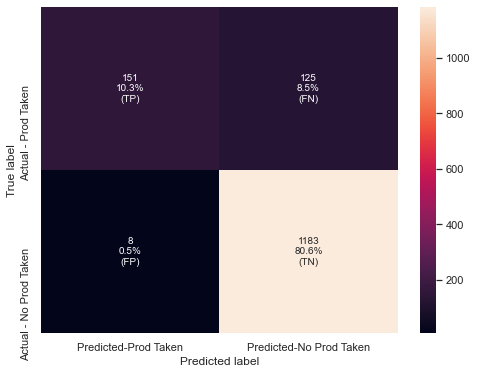

In [94]:
# creating confusion matrix
make_confusion_matrix(model_random_forest,X_test,y_test)

- This Random Forest with class weights model has overfitting problems
- Recall and F1-score on test set are very low

### 7.4 Model Performance Summary

In [95]:
# Print scores for all models
scores

Model  Accuracy on training set  \
0                    Decision Tree                  1.000000   
1               Bagging Classifier                  0.995323   
2  Bagging Classifier with Weights                  0.994154   
3                    Random Forest                  1.000000   
4       Random Forest with Weights                  1.000000   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.884117                1.000000            0.702899   
1              0.912747                0.975155            0.597826   
2              0.901159                0.968944            0.525362   
3              0.909339                1.000000            0.547101   
4              0.906612                1.000000            0.521739   

   Precision on training set  Precision on test set  F1 on training set  \
0                        1.0               0.687943            1.000000   
1                        1.0               0.906593            0.987421   
2                        1.0               0.911950            0.984227   
3                        1.0               0.949686            1.000000   
4                        1.0               0.966443            1.000000   

   F1 on test set  
0        0.695341  
1        0.720524  
2        0.666667  
3        0.694253  
4        0.677647

- All models have overfitting issues. 
- Precision value on test set is low in the decision tree model, but relatively high in the other models
- Recall and f1-score values on test set are low in all models

## 8 Model performance improvement - Bagging
We are going to use f1-score as metric performance with the goal of improve recall score without reduce precision considerably

### 8.1 Tuning Decision Tree
Now we are going to improve and reduce the complexity of the Decision Tree using cost complexity pruning identifying the optimal `ccp_alpha` parameter

In [96]:
# Define Decision Tree and identify pairs of ccp_alphas and impurities
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.18, 1: 0.82})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

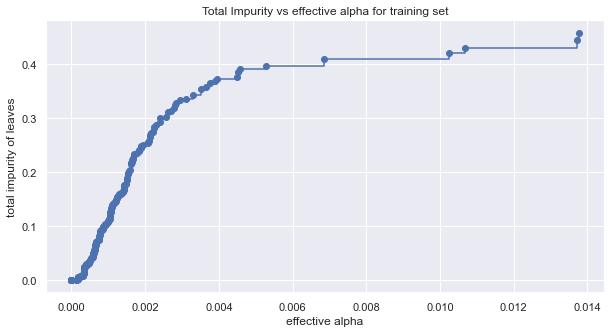

In [97]:
# Graph of Total Impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

We are going to train a decision tree using the effective alphas

In [98]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.18, 1: 0.82})
    clf.fit(X_train, y_train)
    clfs.append(clf)

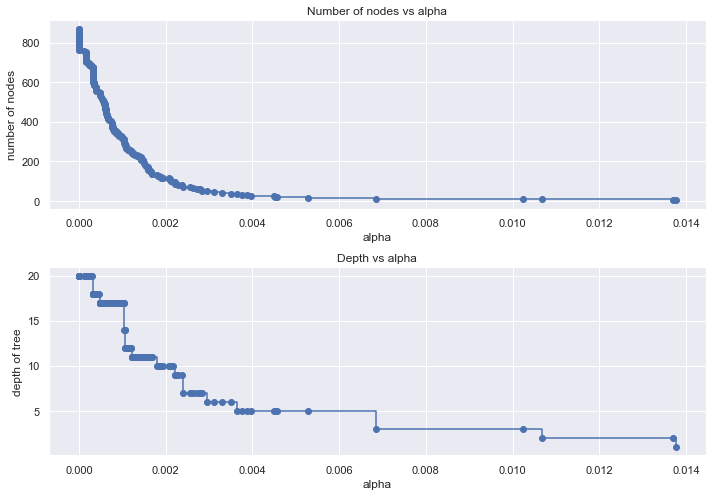

In [99]:
# Graphs of Number of Nodes and Depth of tree vs alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Now, we are going to analyze how the number of nodes and depth of tree reduces with higher alphas

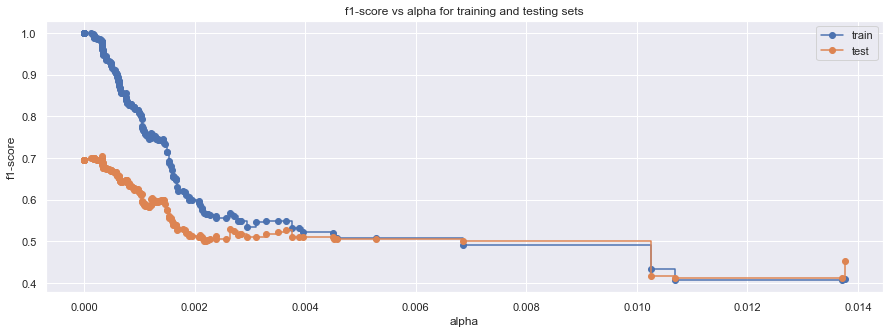

In [100]:
# Get f1-scores  for Train set
f1_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.f1_score(y_train, pred_train3)
    f1_train.append(values_train)

# Get f1-scores for Test set
f1_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.f1_score(y_test, pred_test3)
    f1_test.append(values_test)

# Create Lists with f1-scores scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Plot f1-Scores vs alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("f1-score")
ax.set_title("f1-score vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [101]:
# Model where we get highest train and test f1-score
index_best_model = np.argmax(f1_test)
dt_estimator = clfs[index_best_model]
# Train the model
dt_estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00032312936156255617,
                       class_weight={0: 0.18, 1: 0.82}, random_state=1)

In [102]:
# checking model performances for this model
scores_dt_estimator = metrics_score(dt_estimator,X_train,X_test,y_train,y_test,model_name='Tuned Decision Tree')
scores = scores.append(scores_dt_estimator, ignore_index=True)
scores

Model  Accuracy on training set  \
0                    Decision Tree                  1.000000   
1               Bagging Classifier                  0.995323   
2  Bagging Classifier with Weights                  0.994154   
3                    Random Forest                  1.000000   
4       Random Forest with Weights                  1.000000   
5              Tuned Decision Tree                  0.991231   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.884117                1.000000            0.702899   
1              0.912747                0.975155            0.597826   
2              0.901159                0.968944            0.525362   
3              0.909339                1.000000            0.547101   
4              0.906612                1.000000            0.521739   
5              0.884117                1.000000            0.735507   

   Precision on training set  Precision on test set  F1 on training set  \
0                    1.00000               0.687943            1.000000   
1                    1.00000               0.906593            0.987421   
2                    1.00000               0.911950            0.984227   
3                    1.00000               0.949686            1.000000   
4                    1.00000               0.966443            1.000000   
5                    0.95549               0.676667            0.977238   

   F1 on test set  
0        0.695341  
1        0.720524  
2        0.666667  
3        0.694253  
4        0.677647  
5        0.704861

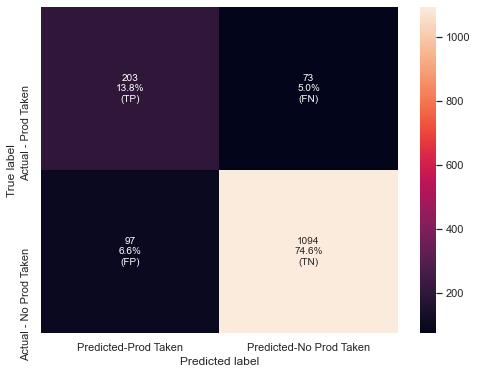

In [103]:
# creating confusion matrix
make_confusion_matrix(dt_estimator,X_test,y_test)

- Metrics are slightly better than the original Decision Tree

### 8.2 Tuning Bagging Classifier

In [104]:
param_grid = {'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid_obj = GridSearchCV(model_bagging_dt, param_grid=param_grid, scoring = 'f1', cv = 5, verbose=2, n_jobs=-1)
grid_obj.fit(X_train, y_train)

# Get the best combination of parameters
bagging_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.18,
                                                                      1: 0.82},
                                                        random_state=1),
                  max_features=0.9, n_estimators=101, random_state=1)

In [105]:
# checking model performances for this model
scores_bagging_estimator = metrics_score(bagging_estimator,X_train,X_test,y_train,y_test,model_name='Tuned Bagging Classifier')
scores = scores.append(scores_bagging_estimator, ignore_index=True)
scores

Model  Accuracy on training set  \
0                    Decision Tree                  1.000000   
1               Bagging Classifier                  0.995323   
2  Bagging Classifier with Weights                  0.994154   
3                    Random Forest                  1.000000   
4       Random Forest with Weights                  1.000000   
5              Tuned Decision Tree                  0.991231   
6         Tuned Bagging Classifier                  1.000000   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.884117                1.000000            0.702899   
1              0.912747                0.975155            0.597826   
2              0.901159                0.968944            0.525362   
3              0.909339                1.000000            0.547101   
4              0.906612                1.000000            0.521739   
5              0.884117                1.000000            0.735507   
6              0.920927                1.000000            0.608696   

   Precision on training set  Precision on test set  F1 on training set  \
0                    1.00000               0.687943            1.000000   
1                    1.00000               0.906593            0.987421   
2                    1.00000               0.911950            0.984227   
3                    1.00000               0.949686            1.000000   
4                    1.00000               0.966443            1.000000   
5                    0.95549               0.676667            0.977238   
6                    1.00000               0.954545            1.000000   

   F1 on test set  
0        0.695341  
1        0.720524  
2        0.666667  
3        0.694253  
4        0.677647  
5        0.704861  
6        0.743363

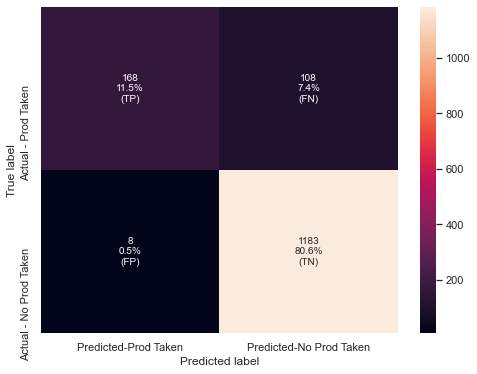

In [106]:
# creating confusion matrix
make_confusion_matrix(bagging_estimator,X_test,y_test)

- This tuned bagging classifier presents overfitting
- Recall and F1-score are low on test set

### 8.3 Tuning Random Forest

In [107]:
# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1,6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(model_random_forest_wt, parameters, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_features=0.7,
                       min_samples_leaf=3, n_estimators=110, random_state=1)

In [108]:
# checking model performances for this model
scores_rf_estimator = metrics_score(rf_estimator,X_train,X_test,y_train,y_test,model_name='Tuned Random Forest')
scores = scores.append(scores_rf_estimator, ignore_index=True)
scores

Model  Accuracy on training set  \
0                    Decision Tree                  1.000000   
1               Bagging Classifier                  0.995323   
2  Bagging Classifier with Weights                  0.994154   
3                    Random Forest                  1.000000   
4       Random Forest with Weights                  1.000000   
5              Tuned Decision Tree                  0.991231   
6         Tuned Bagging Classifier                  1.000000   
7              Tuned Random Forest                  0.990938   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.884117                1.000000            0.702899   
1              0.912747                0.975155            0.597826   
2              0.901159                0.968944            0.525362   
3              0.909339                1.000000            0.547101   
4              0.906612                1.000000            0.521739   
5              0.884117                1.000000            0.735507   
6              0.920927                1.000000            0.608696   
7              0.916837                0.996894            0.688406   

   Precision on training set  Precision on test set  F1 on training set  \
0                   1.000000               0.687943            1.000000   
1                   1.000000               0.906593            0.987421   
2                   1.000000               0.911950            0.984227   
3                   1.000000               0.949686            1.000000   
4                   1.000000               0.966443            1.000000   
5                   0.955490               0.676667            0.977238   
6                   1.000000               0.954545            1.000000   
7                   0.956781               0.840708            0.976426   

   F1 on test set  
0        0.695341  
1        0.720524  
2        0.666667  
3        0.694253  
4        0.677647  
5        0.704861  
6        0.743363  
7        0.756972

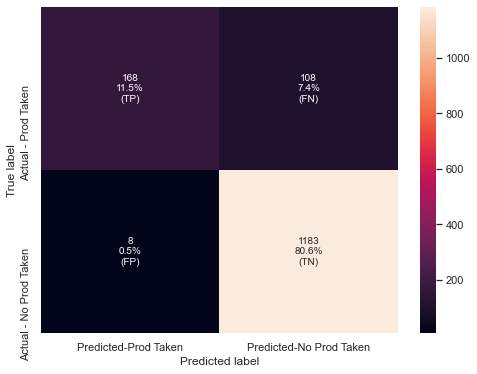

In [109]:
# creating confusion matrix
make_confusion_matrix(bagging_estimator,X_test,y_test)

- This tuned tuned random forest does not presents overfitting
- Recall and F1-score are low on test set

### 8.4 Model Performance Summary

In [110]:
# Print scores for all models
scores.sort_values(by=['Recall on test set'], ascending=False)

Model  Accuracy on training set  \
5              Tuned Decision Tree                  0.991231   
0                    Decision Tree                  1.000000   
7              Tuned Random Forest                  0.990938   
6         Tuned Bagging Classifier                  1.000000   
1               Bagging Classifier                  0.995323   
3                    Random Forest                  1.000000   
2  Bagging Classifier with Weights                  0.994154   
4       Random Forest with Weights                  1.000000   

   Accuracy on test set  Recall on training set  Recall on test set  \
5              0.884117                1.000000            0.735507   
0              0.884117                1.000000            0.702899   
7              0.916837                0.996894            0.688406   
6              0.920927                1.000000            0.608696   
1              0.912747                0.975155            0.597826   
3              0.909339                1.000000            0.547101   
2              0.901159                0.968944            0.525362   
4              0.906612                1.000000            0.521739   

   Precision on training set  Precision on test set  F1 on training set  \
5                   0.955490               0.676667            0.977238   
0                   1.000000               0.687943            1.000000   
7                   0.956781               0.840708            0.976426   
6                   1.000000               0.954545            1.000000   
1                   1.000000               0.906593            0.987421   
3                   1.000000               0.949686            1.000000   
2                   1.000000               0.911950            0.984227   
4                   1.000000               0.966443            1.000000   

   F1 on test set  
5        0.704861  
0        0.695341  
7        0.756972  
6        0.743363  
1        0.720524  
3        0.694253  
2        0.666667  
4        0.677647

- Tuned Random Forest and Tuned Bagging Classifier have the highest f1-score values
- Tuned Decision Tree presents the good metrics in general and it has the highest percentage of True Positives

### 8.5 Feature importance of Tuned Decision Tree

In [111]:
# importance of features in the tree building
impor_fea = pd.DataFrame(dt_estimator.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
impor_fea = impor_fea.reset_index()
impor_fea.head(23)

index       Imp
0                 MonthlyIncome  0.137457
1                           Age  0.133593
2               DurationOfPitch  0.117237
3                      Passport  0.086212
4                      CityTier  0.075115
5                 NumberOfTrips  0.061350
6          MaritalStatus_Single  0.056090
7         PreferredPropertyStar  0.055702
8        PitchSatisfactionScore  0.049261
9             NumberOfFollowups  0.036707
10        ProductPitched_Deluxe  0.029724
11    Occupation_Large Business  0.029644
12                  Gender_Male  0.023978
13   TypeofContact_Self Enquiry  0.020386
14     NumberOfChildrenVisiting  0.018070
15                       OwnCar  0.015857
16      ProductPitched_Standard  0.014287
17    Occupation_Small Business  0.013586
18  ProductPitched_Super Deluxe  0.013234
19       NumberOfPersonVisiting  0.008874
20          Occupation_Salaried  0.002778
21          ProductPitched_King  0.000666
22        MaritalStatus_Married  0.000191

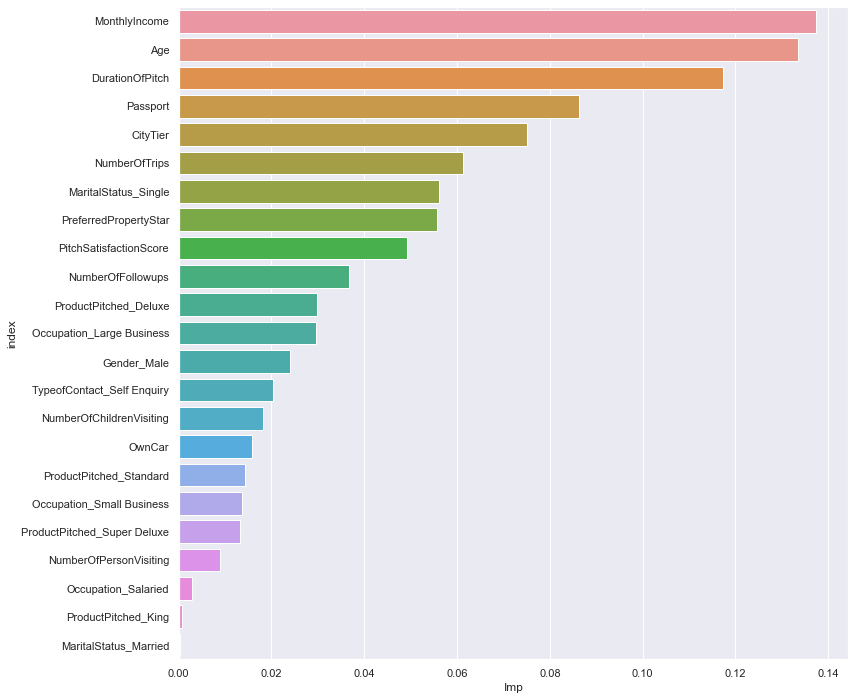

In [112]:
plt.figure(figsize=(12,12))
sns.barplot(x='Imp', y='index', data=impor_fea);

MonthlyIncome, Age and DurationOfPitch are the most important features in the Tuned Decision Tree

## 9 Model building - Boosting

### 9.1 AdaBoost Classifier

In [113]:
model_abc = AdaBoostClassifier(random_state=1)
model_abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [114]:
# checking model performances for this model
scores_boosting = metrics_score(model_abc,X_train,X_test,y_train,y_test,model_name='AdaBoost Classifier')
scores_boosting = pd.DataFrame(scores_boosting,index=[0])
scores_boosting

Model  Accuracy on training set  Accuracy on test set  \
0  AdaBoost Classifier                  0.845659              0.849352   

   Recall on training set  Recall on test set  Precision on training set  \
0                0.318323             0.32971                   0.697279   

   Precision on test set  F1 on training set  F1 on test set  
0               0.716535              0.4371        0.451613

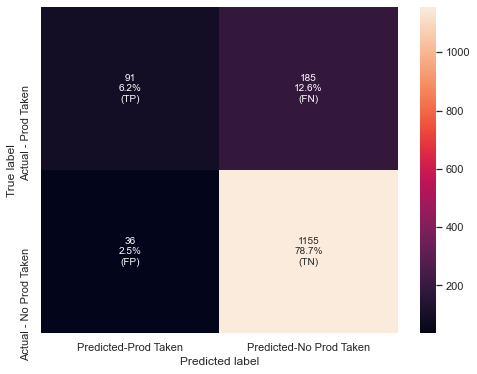

In [115]:
# creating confusion matrix
make_confusion_matrix(model_abc,X_test,y_test)

- This AdaBoost classifier model presents low metrics on both training and test sets

### 9.2 Gradient Boosting Classifier

In [116]:
model_gbc = GradientBoostingClassifier(random_state=1)
model_gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [117]:
# checking model performances for this model
scores_gbc = metrics_score(model_gbc,X_train,X_test,y_train,y_test,model_name='Gradient Boosting Classifier')
scores_boosting = scores_boosting.append(scores_gbc, ignore_index=True)
scores_boosting

Model  Accuracy on training set  \
0           AdaBoost Classifier                  0.845659   
1  Gradient Boosting Classifier                  0.883367   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.849352                0.318323            0.329710   
1              0.862986                0.436335            0.369565   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.697279               0.716535            0.437100   
1                   0.886435               0.790698            0.584807   

   F1 on test set  
0        0.451613  
1        0.503704

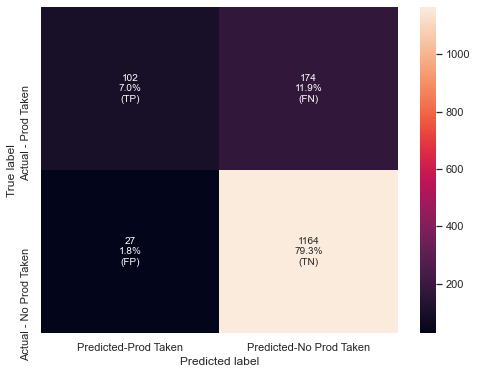

In [118]:
# creating confusion matrix
make_confusion_matrix(model_gbc,X_test,y_test)

- Recall and f1-score metrics are low on both training and test sets for this Gradient Boosting classifier model

### 9.3 XGBoost Classifier

In [119]:
model_xgb = XGBClassifier(random_state=1, eval_metric='logloss', use_label_encoder=False)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [120]:
# checking model performances for this model
scores_xgb = metrics_score(model_xgb,X_train,X_test,y_train,y_test,model_name='XGBoost Classifier')
scores_boosting = scores_boosting.append(scores_xgb, ignore_index=True)
scores_boosting

Model  Accuracy on training set  \
0           AdaBoost Classifier                  0.845659   
1  Gradient Boosting Classifier                  0.883367   
2            XGBoost Classifier                  0.999708   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.849352                0.318323            0.329710   
1              0.862986                0.436335            0.369565   
2              0.925699                0.998447            0.706522   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.697279               0.716535            0.437100   
1                   0.886435               0.790698            0.584807   
2                   1.000000               0.874439            0.999223   

   F1 on test set  
0        0.451613  
1        0.503704  
2        0.781563

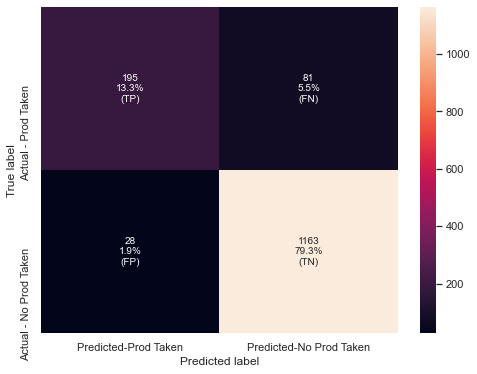

In [121]:
# creating confusion matrix
make_confusion_matrix(model_xgb,X_test,y_test)

- This XGBoost Classifier model presents good metrics on both training and test sets

### 9.4 Stacking Classifier

Now, we are going to create a Stacking Classifier using the Tuned Decision Tree, AdaBoost Classifier, Tuned Random Forest and the XGBoost Classifier

In [122]:
estimators = [('tdt', dt_estimator),
              ('abc', model_abc),
              ('trf', rf_estimator),
              ('xgb', model_xgb)]

In [123]:
model_stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=1),n_jobs=-1)
model_stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('tdt',
                                DecisionTreeClassifier(ccp_alpha=0.00032312936156255617,
                                                       class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       random_state=1)),
                               ('abc', AdaBoostClassifier(random_state=1)),
                               ('trf',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_features=0.7,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('xgb',
                                XGBCl

In [124]:
# checking model performances for this model
scores_stacking = metrics_score(model_stacking,X_train,X_test,y_train,y_test,model_name='Stacking Classifier')
scores_boosting = scores_boosting.append(scores_stacking, ignore_index=True)
scores_boosting

Model  Accuracy on training set  \
0           AdaBoost Classifier                  0.845659   
1  Gradient Boosting Classifier                  0.883367   
2            XGBoost Classifier                  0.999708   
3           Stacking Classifier                  0.999415   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.849352                0.318323            0.329710   
1              0.862986                0.436335            0.369565   
2              0.925699                0.998447            0.706522   
3              0.919564                1.000000            0.757246   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.697279               0.716535            0.437100   
1                   0.886435               0.790698            0.584807   
2                   1.000000               0.874439            0.999223   
3                   0.996904               0.803846            0.998450   

   F1 on test set  
0        0.451613  
1        0.503704  
2        0.781563  
3        0.779851

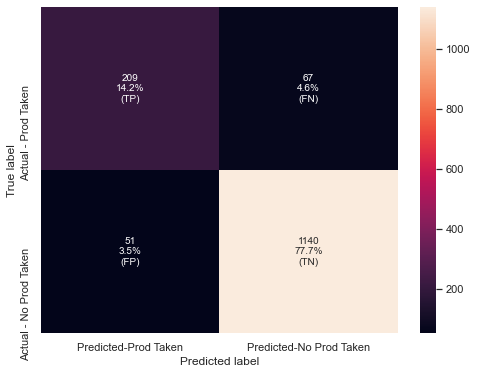

In [125]:
# creating confusion matrix
make_confusion_matrix(model_stacking,X_test,y_test)

- This Stacking Classifier model presents good- metrics on both training and test sets

### 9.5 Model Performance Summary

In [126]:
# Print scores for all models
scores_boosting

Model  Accuracy on training set  \
0           AdaBoost Classifier                  0.845659   
1  Gradient Boosting Classifier                  0.883367   
2            XGBoost Classifier                  0.999708   
3           Stacking Classifier                  0.999415   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.849352                0.318323            0.329710   
1              0.862986                0.436335            0.369565   
2              0.925699                0.998447            0.706522   
3              0.919564                1.000000            0.757246   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.697279               0.716535            0.437100   
1                   0.886435               0.790698            0.584807   
2                   1.000000               0.874439            0.999223   
3                   0.996904               0.803846            0.998450   

   F1 on test set  
0        0.451613  
1        0.503704  
2        0.781563  
3        0.779851

- The Stacking Classifier presents the best results followed by XGBoost Classifier model
- AdaBoost and Gradient Boosting Classifier have low recall and f1-score values

## 10 Model performance improvement - Boosting
We are going to use f1-score as metric performance with the goal of improve recall score without reduce precision considerably

### 10.1 Tuned AdaBoost Classifier

In [127]:
param_grid = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(20,210,20),
    "learning_rate":np.arange(0.2,2,0.2)
}

grid_obj = GridSearchCV(model_abc, param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_obj.fit(X_train, y_train)

# Get the best combination of parameters
abc_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.6, n_estimators=160, random_state=1)

In [128]:
# checking model performances for this model
scores_abc_estimator = metrics_score(abc_estimator,X_train,X_test,y_train,y_test,model_name='Tuned AdaBoost Classifier')
scores_boosting = scores_boosting.append(scores_abc_estimator, ignore_index=True)
scores_boosting

Model  Accuracy on training set  \
0           AdaBoost Classifier                  0.845659   
1  Gradient Boosting Classifier                  0.883367   
2            XGBoost Classifier                  0.999708   
3           Stacking Classifier                  0.999415   
4     Tuned AdaBoost Classifier                  1.000000   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.849352                0.318323            0.329710   
1              0.862986                0.436335            0.369565   
2              0.925699                0.998447            0.706522   
3              0.919564                1.000000            0.757246   
4              0.888207                1.000000            0.659420   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.697279               0.716535            0.437100   
1                   0.886435               0.790698            0.584807   
2                   1.000000               0.874439            0.999223   
3                   0.996904               0.803846            0.998450   
4                   1.000000               0.722222            1.000000   

   F1 on test set  
0        0.451613  
1        0.503704  
2        0.781563  
3        0.779851  
4        0.689394

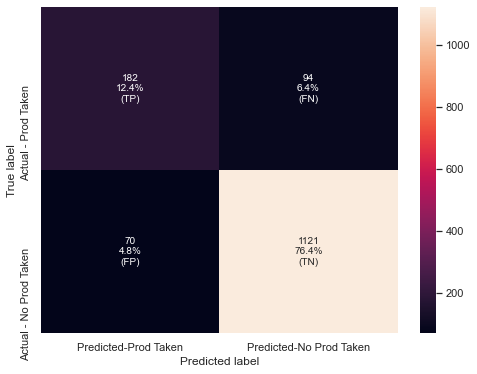

In [129]:
# creating confusion matrix
make_confusion_matrix(abc_estimator,X_test,y_test)

- This Tuned AdaBoost Classifier have overfitting problems. Metrics are 1 in training test but lower in test set

### 10.2 Tuned Gradient Boosting Classifier

In [130]:
param_grid = {
    "n_estimators": np.arange(20,210,20),
    "learning_rate":np.arange(0.2,2,0.2),
    "subsample":[0.8,1],
    "max_features":[0.8,1]
}

grid_obj = GridSearchCV(model_gbc, param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_obj.fit(X_train, y_train)

# Get the best combination of parameters
gbc_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GradientBoostingClassifier(learning_rate=0.6000000000000001, max_features=0.8,
                           n_estimators=200, random_state=1, subsample=1)

In [131]:
# checking model performances for this model
scores_gbc_estimator = metrics_score(gbc_estimator,X_train,X_test,y_train,y_test,model_name='Tuned Gradient Boosting Classifier')
scores_boosting = scores_boosting.append(scores_gbc_estimator, ignore_index=True)
scores_boosting

Model  Accuracy on training set  \
0                 AdaBoost Classifier                  0.845659   
1        Gradient Boosting Classifier                  0.883367   
2                  XGBoost Classifier                  0.999708   
3                 Stacking Classifier                  0.999415   
4           Tuned AdaBoost Classifier                  1.000000   
5  Tuned Gradient Boosting Classifier                  0.996200   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.849352                0.318323            0.329710   
1              0.862986                0.436335            0.369565   
2              0.925699                0.998447            0.706522   
3              0.919564                1.000000            0.757246   
4              0.888207                1.000000            0.659420   
5              0.890934                0.981366            0.634058   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.697279               0.716535            0.437100   
1                   0.886435               0.790698            0.584807   
2                   1.000000               0.874439            0.999223   
3                   0.996904               0.803846            0.998450   
4                   1.000000               0.722222            1.000000   
5                   0.998420               0.747863            0.989820   

   F1 on test set  
0        0.451613  
1        0.503704  
2        0.781563  
3        0.779851  
4        0.689394  
5        0.686275

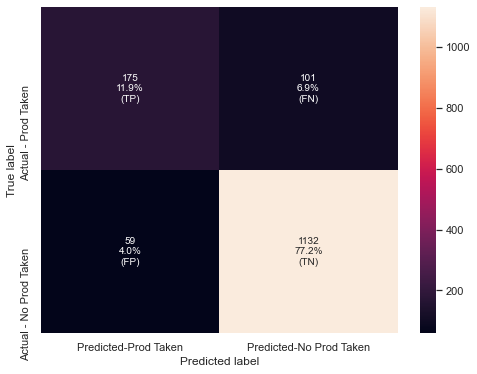

In [132]:
# creating confusion matrix
make_confusion_matrix(gbc_estimator,X_test,y_test)

- This Tuned Gradient Boosting Classifier have overfitting problems. Metrics are higher in training test than in test set

### 10.3 Tuned XGBoost Classifier

In [133]:
param_grid = {
    "n_estimators": np.arange(10,100,40),
    "scale_pos_weight":[0,2,5],
    "subsample":[0.5,0.75,1],
    "learning_rate":[0.05,0.1,0.2],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.75,1],
    "colsample_bylevel":[0.5,0.75,1]
}

grid_obj = GridSearchCV(model_xgb, param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_obj.fit(X_train, y_train)

# Get the best combination of parameters
xgb_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [134]:
# checking model performances for this model
scores_xgb_estimator = metrics_score(xgb_estimator,X_train,X_test,y_train,y_test,model_name='Tuned XGBoost Classifier')
scores_boosting = scores_boosting.append(scores_xgb_estimator, ignore_index=True)
scores_boosting

Model  Accuracy on training set  \
0                 AdaBoost Classifier                  0.845659   
1        Gradient Boosting Classifier                  0.883367   
2                  XGBoost Classifier                  0.999708   
3                 Stacking Classifier                  0.999415   
4           Tuned AdaBoost Classifier                  1.000000   
5  Tuned Gradient Boosting Classifier                  0.996200   
6            Tuned XGBoost Classifier                  0.996200   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.849352                0.318323            0.329710   
1              0.862986                0.436335            0.369565   
2              0.925699                0.998447            0.706522   
3              0.919564                1.000000            0.757246   
4              0.888207                1.000000            0.659420   
5              0.890934                0.981366            0.634058   
6              0.927744                0.998447            0.797101   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.697279               0.716535            0.437100   
1                   0.886435               0.790698            0.584807   
2                   1.000000               0.874439            0.999223   
3                   0.996904               0.803846            0.998450   
4                   1.000000               0.722222            1.000000   
5                   0.998420               0.747863            0.989820   
6                   0.981679               0.814815            0.989992   

   F1 on test set  
0        0.451613  
1        0.503704  
2        0.781563  
3        0.779851  
4        0.689394  
5        0.686275  
6        0.805861

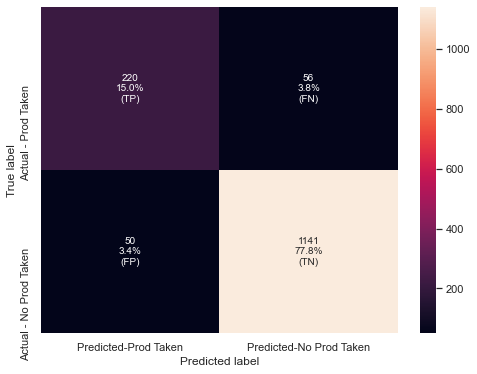

In [135]:
# creating confusion matrix
make_confusion_matrix(xgb_estimator,X_test,y_test)

- This Tuned XGBoost Classifier presents the highest recall and f1-score metrics on test set

### 10.4 Tuned Stacking Classifier
Now, we are going to create a Tuned Stacking Classifier using the Tuned Decision Tree, Tuned AdaBoost Classifier, Tuned Random Forest, Tuned Gradient Boosting Classifier, and Tuned XGBoost Classifier

In [136]:
estimators = [('tabc', abc_estimator),
              ('trf', rf_estimator),
              ('tgbc', gbc_estimator),
              ('txgb', xgb_estimator)]

In [137]:
model_tuned_stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=1),n_jobs=-1)
model_tuned_stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('tabc',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.6,
                                                   n_estimators=160,
                                                   random_state=1)),
                               ('trf',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_features=0.7,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('tgbc',
                                GradientBoostingClassifier(learning_rate=0.600000000...
                               

In [138]:
# checking model performances for this model
scores_tuned_stacking = metrics_score(model_tuned_stacking,X_train,X_test,y_train,y_test,model_name='Tuned Stacking Classifier')
scores_boosting = scores_boosting.append(scores_tuned_stacking, ignore_index=True)
scores_boosting

Model  Accuracy on training set  \
0                 AdaBoost Classifier                  0.845659   
1        Gradient Boosting Classifier                  0.883367   
2                  XGBoost Classifier                  0.999708   
3                 Stacking Classifier                  0.999415   
4           Tuned AdaBoost Classifier                  1.000000   
5  Tuned Gradient Boosting Classifier                  0.996200   
6            Tuned XGBoost Classifier                  0.996200   
7           Tuned Stacking Classifier                  0.997077   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.849352                0.318323            0.329710   
1              0.862986                0.436335            0.369565   
2              0.925699                0.998447            0.706522   
3              0.919564                1.000000            0.757246   
4              0.888207                1.000000            0.659420   
5              0.890934                0.981366            0.634058   
6              0.927744                0.998447            0.797101   
7              0.921609                0.993789            0.739130   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.697279               0.716535            0.437100   
1                   0.886435               0.790698            0.584807   
2                   1.000000               0.874439            0.999223   
3                   0.996904               0.803846            0.998450   
4                   1.000000               0.722222            1.000000   
5                   0.998420               0.747863            0.989820   
6                   0.981679               0.814815            0.989992   
7                   0.990712               0.825911            0.992248   

   F1 on test set  
0        0.451613  
1        0.503704  
2        0.781563  
3        0.779851  
4        0.689394  
5        0.686275  
6        0.805861  
7        0.780115

### 10.5 Model Performance Summary

In [139]:
# Print scores for all models
scores_boosting.sort_values(by=['Recall on test set'], ascending=False)

Model  Accuracy on training set  \
6            Tuned XGBoost Classifier                  0.996200   
3                 Stacking Classifier                  0.999415   
7           Tuned Stacking Classifier                  0.997077   
2                  XGBoost Classifier                  0.999708   
4           Tuned AdaBoost Classifier                  1.000000   
5  Tuned Gradient Boosting Classifier                  0.996200   
1        Gradient Boosting Classifier                  0.883367   
0                 AdaBoost Classifier                  0.845659   

   Accuracy on test set  Recall on training set  Recall on test set  \
6              0.927744                0.998447            0.797101   
3              0.919564                1.000000            0.757246   
7              0.921609                0.993789            0.739130   
2              0.925699                0.998447            0.706522   
4              0.888207                1.000000            0.659420   
5              0.890934                0.981366            0.634058   
1              0.862986                0.436335            0.369565   
0              0.849352                0.318323            0.329710   

   Precision on training set  Precision on test set  F1 on training set  \
6                   0.981679               0.814815            0.989992   
3                   0.996904               0.803846            0.998450   
7                   0.990712               0.825911            0.992248   
2                   1.000000               0.874439            0.999223   
4                   1.000000               0.722222            1.000000   
5                   0.998420               0.747863            0.989820   
1                   0.886435               0.790698            0.584807   
0                   0.697279               0.716535            0.437100   

   F1 on test set  
6        0.805861  
3        0.779851  
7        0.780115  
2        0.781563  
4        0.689394  
5        0.686275  
1        0.503704  
0        0.451613

- Tuned XGBoost presents the highest Recall and F1-score on test set and it has the highest percentage of True Positives

### 10.6 Feature importance of Tuned XGBoost Classifier

In [140]:
# importance of features in the tree building
impor_fea = pd.DataFrame(xgb_estimator.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
impor_fea = impor_fea.reset_index()
impor_fea.head(23)

index       Imp
0                      Passport  0.136961
1          MaritalStatus_Single  0.088133
2   ProductPitched_Super Deluxe  0.079314
3     Occupation_Large Business  0.056758
4           ProductPitched_King  0.054884
5         ProductPitched_Deluxe  0.054508
6                      CityTier  0.046962
7         PreferredPropertyStar  0.042297
8             NumberOfFollowups  0.040386
9        PitchSatisfactionScore  0.037852
10              DurationOfPitch  0.036083
11    Occupation_Small Business  0.034659
12                          Age  0.034024
13                NumberOfTrips  0.032568
14                MonthlyIncome  0.032438
15      ProductPitched_Standard  0.032164
16          Occupation_Salaried  0.028322
17                  Gender_Male  0.027022
18                       OwnCar  0.024030
19        MaritalStatus_Married  0.022292
20   TypeofContact_Self Enquiry  0.021688
21       NumberOfPersonVisiting  0.019990
22     NumberOfChildrenVisiting  0.016663

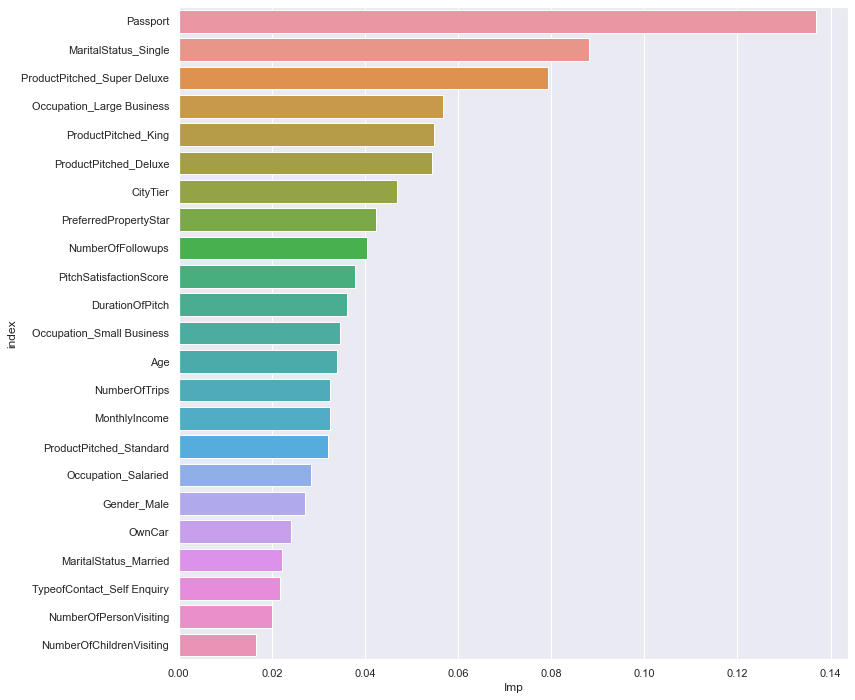

In [141]:
plt.figure(figsize=(12,12))
sns.barplot(x='Imp', y='index', data=impor_fea);

Passport, MaritalStatus_Single and ProdcutPitched_Super Deluxe are the most important features in the Tuned XGBoost Classifier

## 11 Actionable Insights and Recommendations
- `Visit with us` company can use the Tuned XGBoost Classifier to properly identify the customers that would buy a package
- The False Positives are low so the company does not incurred in extra cost targeting customers that would not buy a package
- The False Negatives are also low so the company is not missing customers that would buy a package
- `Visit with us` should target Single customers with Passport
- The new Wellness Tourism Package should include characteristics similar than Deluxe, Super Deluxe or King packages
- Salespersons should perform several follow-ups and have a high Pitch Satisfaction Score because that could increase the odds of a customer buying a package
